# Setup

In [1]:
import pandas as pd
import numpy as np
import pickle
import time
import matplotlib.pyplot as plt
import seaborn as sns
from custom_methods.investigation import \
    point_biserial_corr, \
    correlation_ratios, \
    pop_proportion, \
    plot_heatmap, \
    plot_pn_mo_away_on
from dython.nominal import associations


datapath = '../Data/'
plt.rcParams.update({'figure.figsize':(11,7), 'figure.dpi':120})
filename = 'processed.pickle'
image_dest = 'results_images/'
visual_specs={'fontsize':14, 'palette':'Greys', 'saturation':0.5}

startTime = time.time()

In [27]:
infile = open(datapath+filename,'rb')
df = pickle.load(infile)
infile.close()

df.columns.to_list()

['SPA_PER_ID',
 'SPA_PREM_ID',
 'MONTH',
 'SPA_ACCT_ID',
 'RES_EL_CUR120_DAYS',
 'RES_EL_CUR22_DAYS',
 'RES_EL_CUR30_DAYS',
 'RES_EL_CUR60_DAYS',
 'RES_EL_CUR90_DAYS',
 'RES_EL_CUR_BAL_AMT',
 'RES_EL_OVER_120_DAYS',
 'RES_GAS_CUR120_DAYS',
 'RES_GAS_CUR22_DAYS',
 'RES_GAS_CUR30_DAYS',
 'RES_GAS_CUR60_DAYS',
 'RES_GAS_CUR90_DAYS',
 'RES_GAS_CUR_BAL_AMT',
 'RES_GAS_OVER_120_DAYS',
 'BREAK_ARRANGEMENT',
 'BREAK_PAY_PLAN',
 'CALL_OUT',
 'CALL_OUT_MANUAL',
 'DUE_DATE',
 'FINAL_NOTICE',
 'PAST_DUE',
 'SEVERANCE_ELECTRIC',
 'SEVERANCE_GAS',
 'CITY_TOT_DUE',
 'CITY_30_DAYS_PAST_DUE_AMT',
 'CITY_60_DAYS_PAST_DUE_AMT',
 'CITY_90_DAYS_PAST_DUE_AMT',
 'CMIS_MATCH',
 'APARTMENT',
 'ENROLL_DATE',
 'HAS_COTENANT',
 'BLOCKGROUP_GEOID',
 'POSTAL',
 'MULTI_DWELL_ID',
 'AGG_INCOME_GEO',
 'NO_EARNINGS_GEO',
 'BELOW_POVERTY_LVL_GEO',
 'SNAP_GEO',
 'ABOVE_GRD7_GEO',
 'PUBLIC_ASSIST_GEO',
 'PER-PREM-MONTH_ID',
 'AVISTA_CUR120_DAYS',
 'AVISTA_OVER_120_DAYS',
 'AVISTA_CUR22_DAYS',
 'AVISTA_CUR30_DAYS',
 'AVIST

## Column Groupings

In [3]:
outcome_cols = [
    'CMIS_MATCH',
    'MO_AWAY',
    'WITHIN_6_MO_PRIOR_LAST_DATA',
    'LAST_MO_W_DATA',
]

categorical_cols = [
    'SPA_PER_ID',
    'SPA_PREM_ID',
    'SPA_ACCT_ID',
    'PER-PREM-MONTH_ID',
    'APARTMENT',
    'HAS_COTENANT',
    'BLOCKGROUP_GEOID',
    'POSTAL',
    'MULTI_DWELL_ID'
]

numerical_cols = [
    # Billing
    'RES_EL_CUR120_DAYS',
    'RES_EL_CUR22_DAYS',
    'RES_EL_CUR30_DAYS',
    'RES_EL_CUR60_DAYS',
    'RES_EL_CUR90_DAYS',
    'RES_EL_CUR_BAL_AMT',
    'RES_EL_OVER_120_DAYS',
    'RES_GAS_CUR120_DAYS',
    'RES_GAS_CUR22_DAYS',
    'RES_GAS_CUR30_DAYS',
    'RES_GAS_CUR60_DAYS',
    'RES_GAS_CUR90_DAYS',
    'RES_GAS_CUR_BAL_AMT',
    'RES_GAS_OVER_120_DAYS',
    'CITY_TOT_DUE',
    'CITY_30_DAYS_PAST_DUE_AMT',
    'CITY_60_DAYS_PAST_DUE_AMT',
    'CITY_90_DAYS_PAST_DUE_AMT',
    'AVISTA_CUR120_DAYS',
    'AVISTA_OVER_120_DAYS',
    'AVISTA_CUR22_DAYS',
    'AVISTA_CUR30_DAYS',
    'AVISTA_CUR60_DAYS',
    'AVISTA_CUR90_DAYS',
    'AVISTA_CUR_BAL_AMT',
    'TOTAL_30_DAYS_AMT',
    'TOTAL_60_DAYS_AMT',
    'TOTAL_90_DAYS_AMT',
    'TOTAL_CUR_BALANCE',
    # Others
    'ARREARSMONTH',
    'BREAK_ARRANGEMENT',
    'BREAK_PAY_PLAN',
    'CALL_OUT',
    'CALL_OUT_MANUAL',
    'DUE_DATE',
    'FINAL_NOTICE',
    'PAST_DUE',
    'SEVERANCE_ELECTRIC',
    'SEVERANCE_GAS',
    'COVID_REMINDER',
    'AGG_INCOME_GEO',
    'NO_EARNINGS_GEO',
    'BELOW_POVERTY_LVL_GEO',
    'SNAP_GEO',
    'ABOVE_GRD7_GEO',
    'PUBLIC_ASSIST_GEO',
    'NUM_PREM_FOR_PER',
    'NUM_PER_FOR_PREM',
    'MULTI_DWELL_SIZE'
]

other_cols = [
    'ENROLL_DATE',
    'MONTH'
]

keep = [
    'PAST_DUE',
    'TOTAL_60_DAYS_AMT',
    'NUM_PREM_FOR_PER',
    'BREAK_ARRANGEMENT',
    'COVID_REMINDER',
    'MULTI_DWELL_SIZE',
    'SNAP_GEO',
    'NUM_PER_FOR_PREM',
    'APARTMENT',
    'HAS_COTENANT'
]

In [4]:
columns = df.columns.to_list()

leftover = [x for x in columns if x not in (outcome_cols + categorical_cols + other_cols + numerical_cols)]
leftover

[]

# Which Outcome Measure to Use?

## Categorical

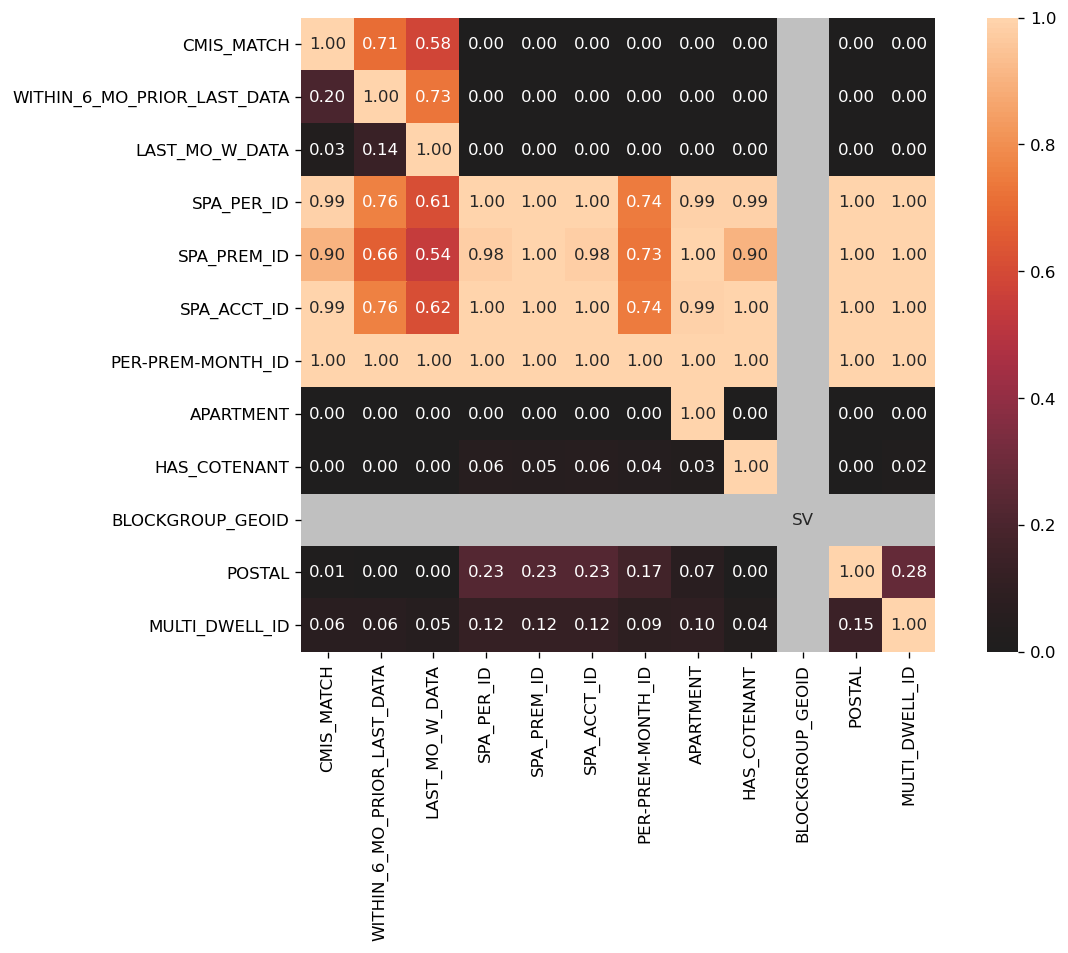

In [5]:
corr_cat = associations(
    dataset=df[outcome_cols+categorical_cols].drop('MO_AWAY', axis=1), 
    nominal_columns='all', 
    nom_nom_assoc='theil', 
    plot=False
)['corr']

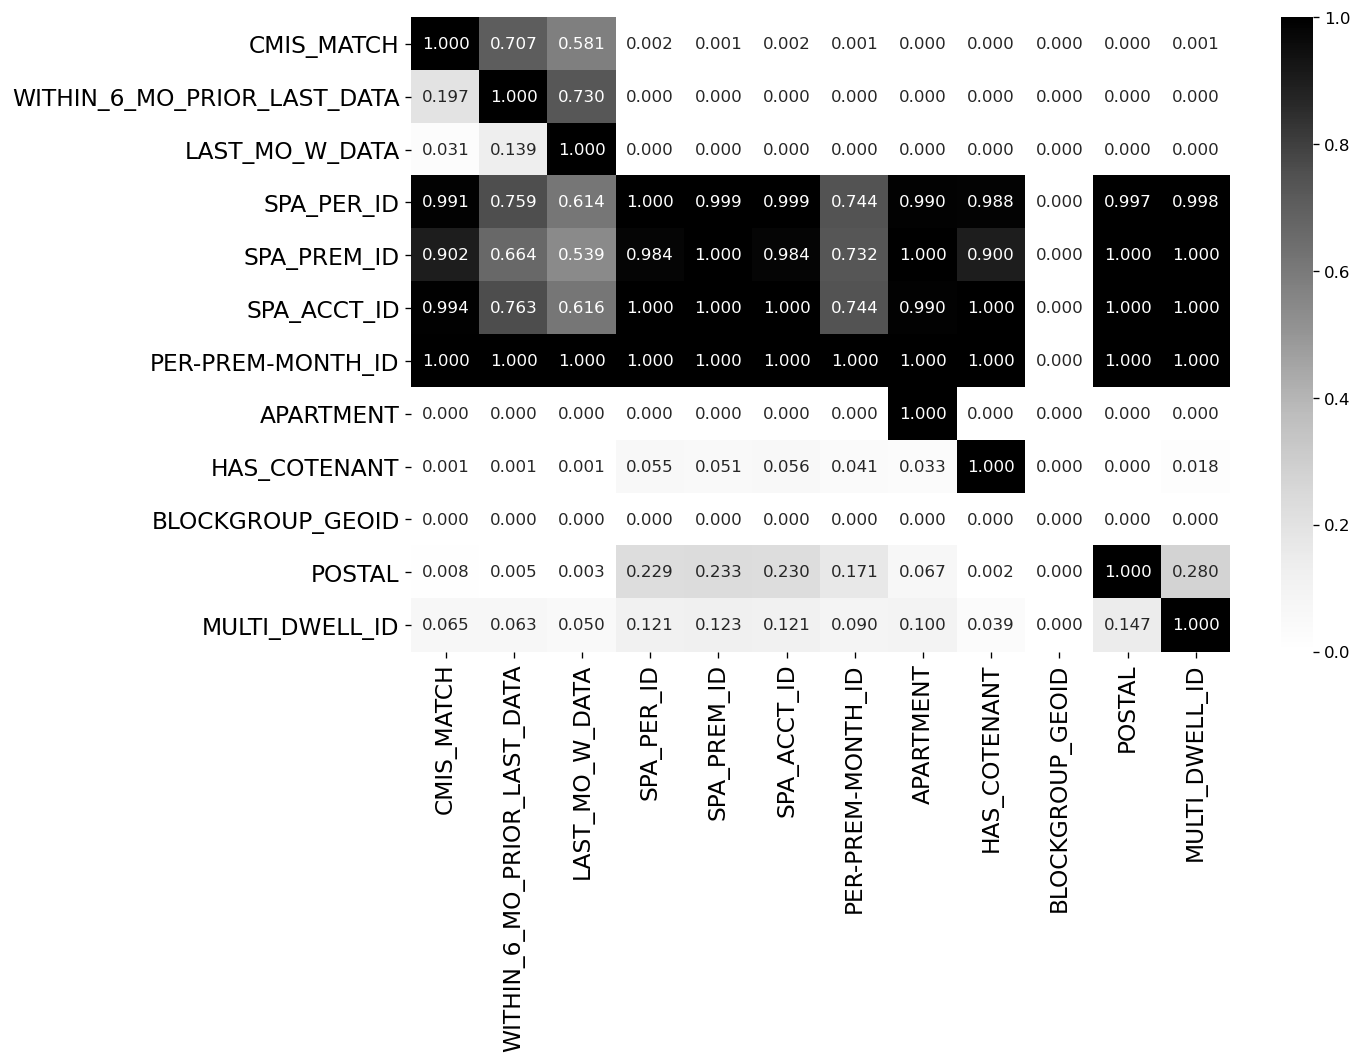

In [6]:
plot_heatmap(corr=corr_cat, visual_specs=visual_specs, fname='cat_theil', image_dest=image_dest)

## MO_AWAY

In [11]:
# spearman (continuous-continuous)
corr_mo_away = abs(df[['MO_AWAY'] + numerical_cols].corr(method='spearman')['MO_AWAY'])
# correlation ratio (continuous-categorical)
corr_mo_away = corr_mo_away.append(correlation_ratios(categorical=df[categorical_cols], continuous=df['MO_AWAY'].to_frame()).squeeze())

## CMIS MATCH

C:\Users\Colin\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:4321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


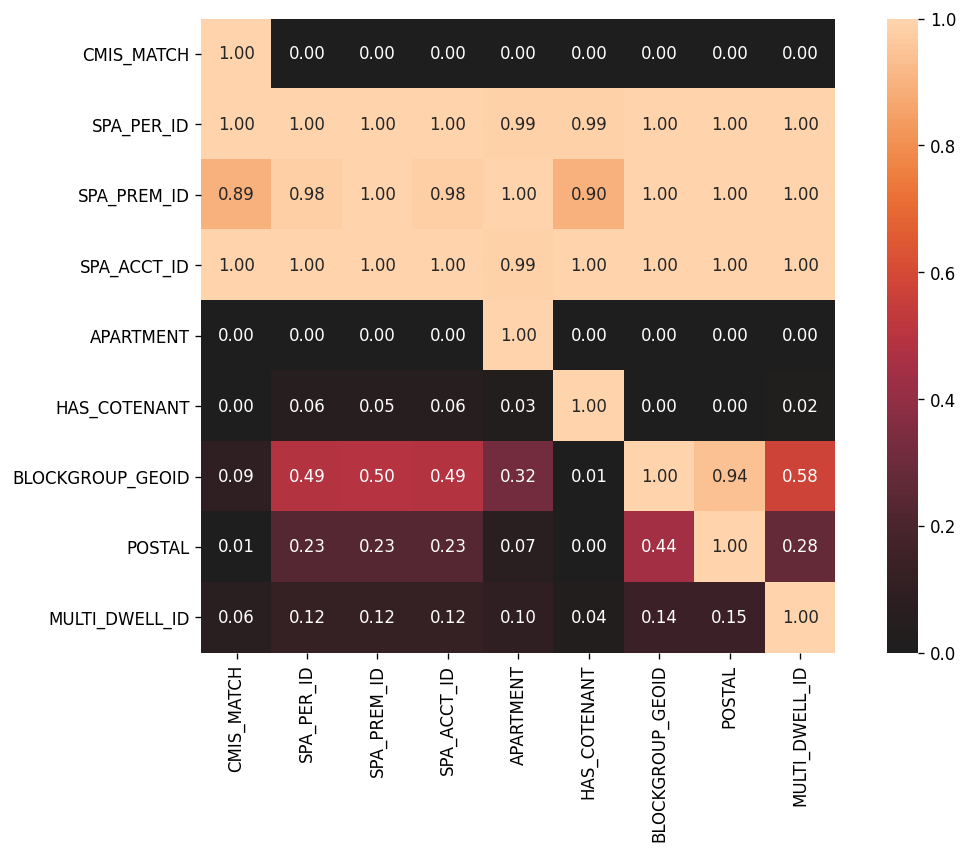

In [12]:
outcome = 'CMIS_MATCH'
# point-biserial (binary-continuous)
corr_cmis_match = point_biserial_corr(continuous=df[numerical_cols], binary=df[outcome].to_frame()).squeeze()
# theil's U (categorical-categorical)
corr_cmis_match = corr_cmis_match.append(associations(dataset=df[[outcome]+categorical_cols], nominal_columns='all', theil_u=True, plot=False)['corr'][outcome])

## LAST_MO_W_DATA

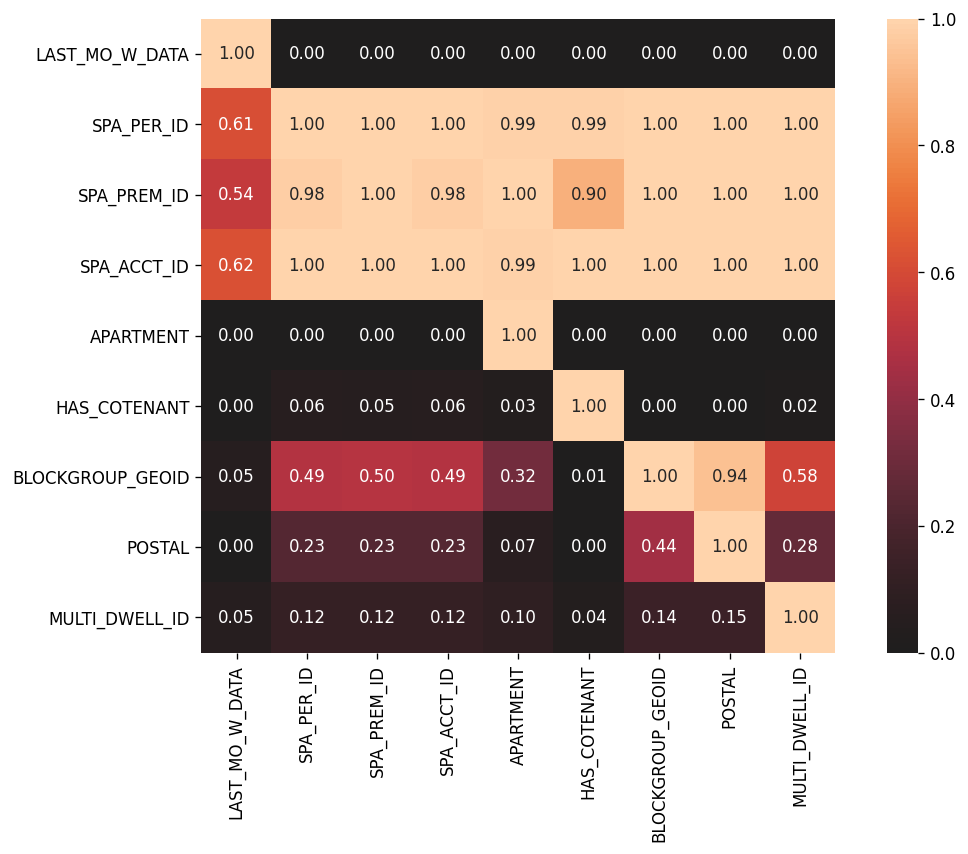

In [13]:
outcome = 'LAST_MO_W_DATA'
# point-biserial (binary-continuous)
corr_last_mo = point_biserial_corr(continuous=df[numerical_cols], binary=df[outcome].to_frame()).squeeze()
# theil's U (categorical-categorical)
corr_last_mo = corr_last_mo.append(associations(dataset=df[[outcome]+categorical_cols], nominal_columns='all', theil_u=True, plot=False)['corr'][outcome])

## WITHIN_6_MO_LAST

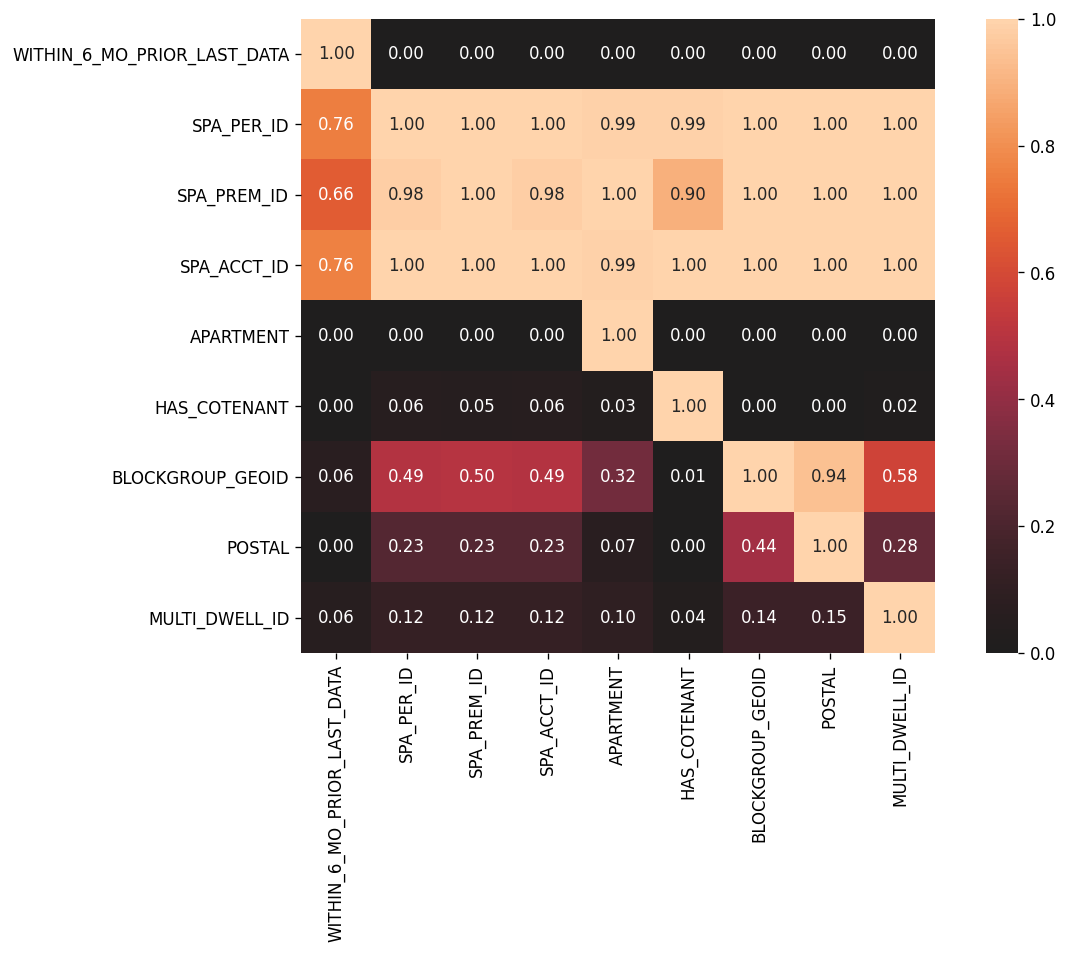

In [14]:
outcome = 'WITHIN_6_MO_PRIOR_LAST_DATA'
# point-biserial (binary-continuous)
corr_within_6_mo_last = point_biserial_corr(continuous=df[numerical_cols], binary=df[outcome].to_frame()).squeeze()
# theil's U (categorical-categorical)
corr_within_6_mo_last = corr_within_6_mo_last.append(associations(dataset=df[[outcome]+categorical_cols], nominal_columns='all', theil_u=True, plot=False)['corr'][outcome])

## Combine Into Single Table

In [15]:
corr_combined = pd.concat([corr_mo_away, corr_cmis_match, corr_last_mo, corr_within_6_mo_last], axis=1)

In [16]:
print(corr_combined.sort_values(by='CMIS_MATCH', ascending=False).to_latex(longtable=True)) 

\begin{longtable}{lrrrr}
\toprule
{} &   MO\_AWAY &  CMIS\_MATCH &  LAST\_MO\_W\_DATA &  WITHIN\_6\_MO\_PRIOR\_LAST\_DATA \\
\midrule
\endhead
\midrule
\multicolumn{5}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
CMIS\_MATCH                  &       NaN &    1.000000 &             NaN &                          NaN \\
SPA\_ACCT\_ID                 &  0.977173 &    1.000000 &        0.617846 &                     0.761776 \\
SPA\_PER\_ID                  &  0.972344 &    1.000000 &        0.614315 &                     0.757266 \\
SPA\_PREM\_ID                 &  0.829606 &    0.893746 &        0.537856 &                     0.660464 \\
BLOCKGROUP\_GEOID            &  0.059006 &    0.094594 &        0.049547 &                     0.063740 \\
PAST\_DUE                    &  0.060032 &    0.065804 &        0.007070 &                     0.022790 \\
FINAL\_NOTICE                &  0.061553 &    0.064388 &        0.007101 &                     0.023284 \\
MULT

In [17]:
print(corr_combined.sort_values(by='CMIS_MATCH', ascending=False).iloc[:15].to_latex(float_format="%.2f", caption="Top fifteen (sorted by CMIS\_MATCH) associated variables.", label="tbl:assocWithOutcome15"))

\begin{table}
\centering
\caption{Top fifteen (sorted by CMIS\_MATCH) associated variables.}
\label{tbl:assocWithOutcome15}
\begin{tabular}{lrrrr}
\toprule
{} &  MO\_AWAY &  CMIS\_MATCH &  LAST\_MO\_W\_DATA &  WITHIN\_6\_MO\_PRIOR\_LAST\_DATA \\
\midrule
CMIS\_MATCH         &      NaN &        1.00 &             NaN &                          NaN \\
SPA\_ACCT\_ID        &     0.98 &        1.00 &            0.62 &                         0.76 \\
SPA\_PER\_ID         &     0.97 &        1.00 &            0.61 &                         0.76 \\
SPA\_PREM\_ID        &     0.83 &        0.89 &            0.54 &                         0.66 \\
BLOCKGROUP\_GEOID   &     0.06 &        0.09 &            0.05 &                         0.06 \\
PAST\_DUE           &     0.06 &        0.07 &            0.01 &                         0.02 \\
FINAL\_NOTICE       &     0.06 &        0.06 &            0.01 &                         0.02 \\
MULTI\_DWELL\_ID     &     0.13 &        0.06 &            0.05

# Which Years to Use?
* Measure association between each predictor and outcome for each year  
* Compare rankings of associations from year to year

## Month Ranges
Note: Ranges are inclusive, exlusive, to match Python indexing  
2015: [0]  
2016: [1:13]  
2017: [13:25]  
2018: [25:37]  
2019: [37:49]  
2020: [49:61]

In [53]:
infile = open(datapath+filename,'rb')
df = pickle.load(infile)
infile.close()

keep = [
    'MONTH',
    'CMIS_MATCH',
    'PAST_DUE',
    'TOTAL_CUR_BALANCE',
    'NUM_PREM_FOR_PER',
    'BREAK_ARRANGEMENT',
    'NUM_PER_FOR_PREM'
]

df = df[keep]

In [55]:
df[df['MONTH'] == 0]['NUM_PREM_FOR_PER'].unique()

array([1.])

In [56]:
df[df['MONTH'] == 0]['NUM_PER_FOR_PREM'].unique()

array([1.])

In [54]:
corr_15 = df[df['MONTH'] == 0].corr(method='spearman')['CMIS_MATCH']
corr_16 = df[(df['MONTH'] >= 1) & (df['MONTH'] < 13)].corr(method='spearman')['CMIS_MATCH']
corr_17 = df[(df['MONTH'] >= 13) & (df['MONTH'] < 25)].corr(method='spearman')['CMIS_MATCH']
corr_18 = df[(df['MONTH'] >= 25) & (df['MONTH'] < 37)].corr(method='spearman')['CMIS_MATCH']
corr_19 = df[(df['MONTH'] >= 37) & (df['MONTH'] < 49)].corr(method='spearman')['CMIS_MATCH']
corr_20 = df[(df['MONTH'] >= 49)].corr(method='spearman')['CMIS_MATCH']

corr_15

MONTH                     NaN
CMIS_MATCH           1.000000
PAST_DUE             0.076956
TOTAL_CUR_BALANCE    0.038331
NUM_PREM_FOR_PER          NaN
BREAK_ARRANGEMENT    0.043024
NUM_PER_FOR_PREM          NaN
Name: CMIS_MATCH, dtype: float64

## Number of events

In [17]:
negatives = df[~df.CMIS_MATCH].SPA_PER_ID.nunique()
positives = df[df.CMIS_MATCH].SPA_PER_ID.nunique()
events_by_time = df.groupby(['ARREARSMONTH', 'CMIS_MATCH']).SPA_PER_ID.nunique().reset_index()
events_by_time.update(events_by_time[events_by_time.CMIS_MATCH].SPA_PER_ID / positives)
events_by_time.update(events_by_time[~events_by_time.CMIS_MATCH].SPA_PER_ID / positives)
events_by_time.head()

,ARREARSMONTH,CMIS_MATCH,SPA_PER_ID
0,0,False,48952.000000
1,0,True,0.579470
2,1,False,48166.000000
3,1,True,0.549669
4,2,False,48462.000000


<AxesSubplot:xlabel='ARREARSMONTH', ylabel='SPA_PER_ID'>

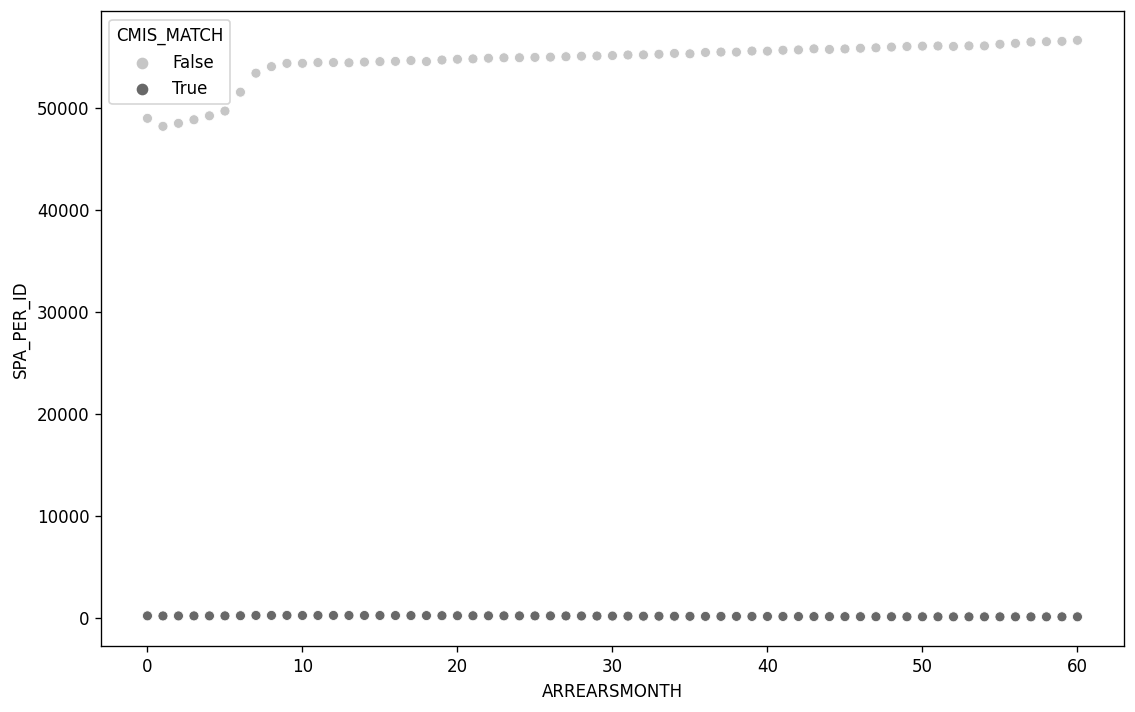

In [10]:
sns.scatterplot(data=events_by_time, x='ARREARSMONTH', y='SPA_PER_ID', hue='CMIS_MATCH', palette=visual_specs['palette'])

## Find and compare ranks of variables

In [69]:
ranks = pd.DataFrame(index=df.columns)
ranks[2015] = corr_15.rank()
ranks[2016] = corr_16.rank()
ranks[2017] = corr_17.rank()
ranks[2018] = corr_18.rank()
ranks[2019] = corr_19.rank()
ranks[2020] = corr_20.rank()
# Drop "MONTH" and "CMIS_MATCH"
ranks = ranks.reset_index()
ranks = ranks[~(ranks['index'] == 'MONTH')]
ranks = ranks[~(ranks['index'] == 'CMIS_MATCH')]
ranks = ranks.set_index('index').rank()
ranks = ranks.reset_index().rename(columns={'index': 'Variable'})
# Assume NUM_PER_FOR_PREM and NUM_PREM_FOR_PER will take up ranks 1 and 2 in 2015
ranks[2015] = ranks[2015] + 2
ranks = ranks.sort_values(by=2020)
ranks

,Variable,2015,2016,2017,2018,2019,2020
4,NUM_PER_FOR_PREM,NaN,2.0,3.0,2.0,1.0,1.0
2,NUM_PREM_FOR_PER,NaN,1.0,1.0,1.0,2.0,2.0
1,TOTAL_CUR_BALANCE,3.0,4.0,4.0,4.0,4.0,3.0
3,BREAK_ARRANGEMENT,4.0,3.0,2.0,3.0,3.0,4.0
0,PAST_DUE,5.0,5.0,5.0,5.0,5.0,5.0


In [73]:
print(ranks.to_latex(float_format="%.0f", index=False))

\begin{tabular}{lrrrrrr}
\toprule
         Variable &  2015 &  2016 &  2017 &  2018 &  2019 &  2020 \\
\midrule
 NUM\_PER\_FOR\_PREM &   NaN &     2 &     3 &     2 &     1 &     1 \\
 NUM\_PREM\_FOR\_PER &   NaN &     1 &     1 &     1 &     2 &     2 \\
TOTAL\_CUR\_BALANCE &     3 &     4 &     4 &     4 &     4 &     3 \\
BREAK\_ARRANGEMENT &     4 &     3 &     2 &     3 &     3 &     4 \\
         PAST\_DUE &     5 &     5 &     5 &     5 &     5 &     5 \\
\bottomrule
\end{tabular}



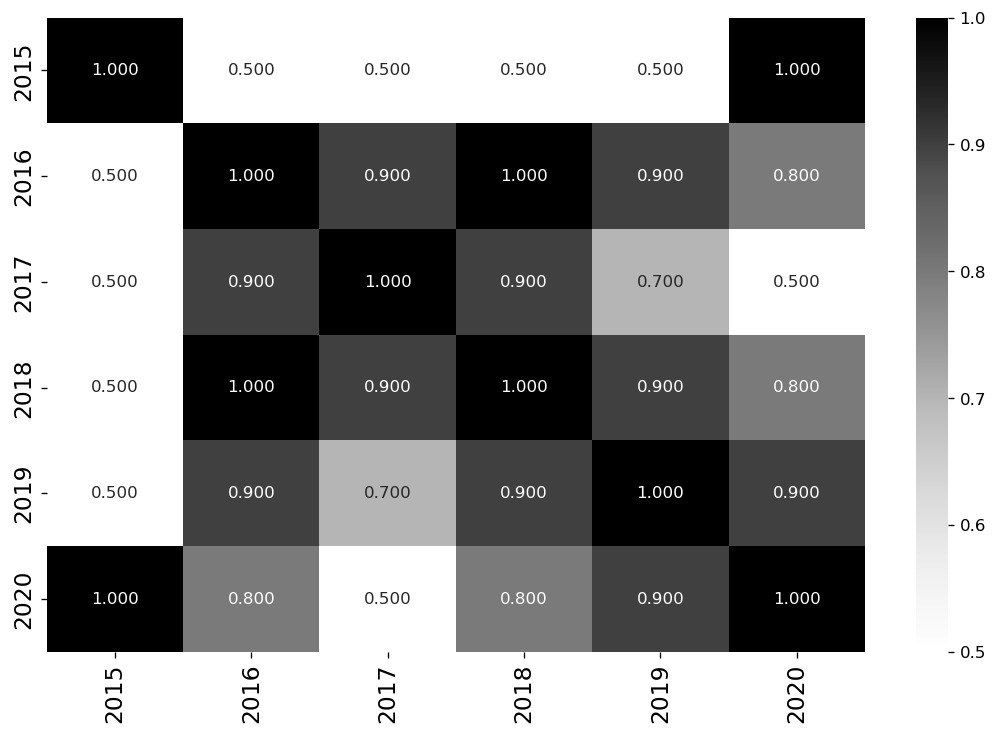

In [70]:
plot_heatmap(
    corr=ranks.corr(method='spearman'),
    visual_specs=visual_specs,
    fname='corr_years',
    image_dest=image_dest
)

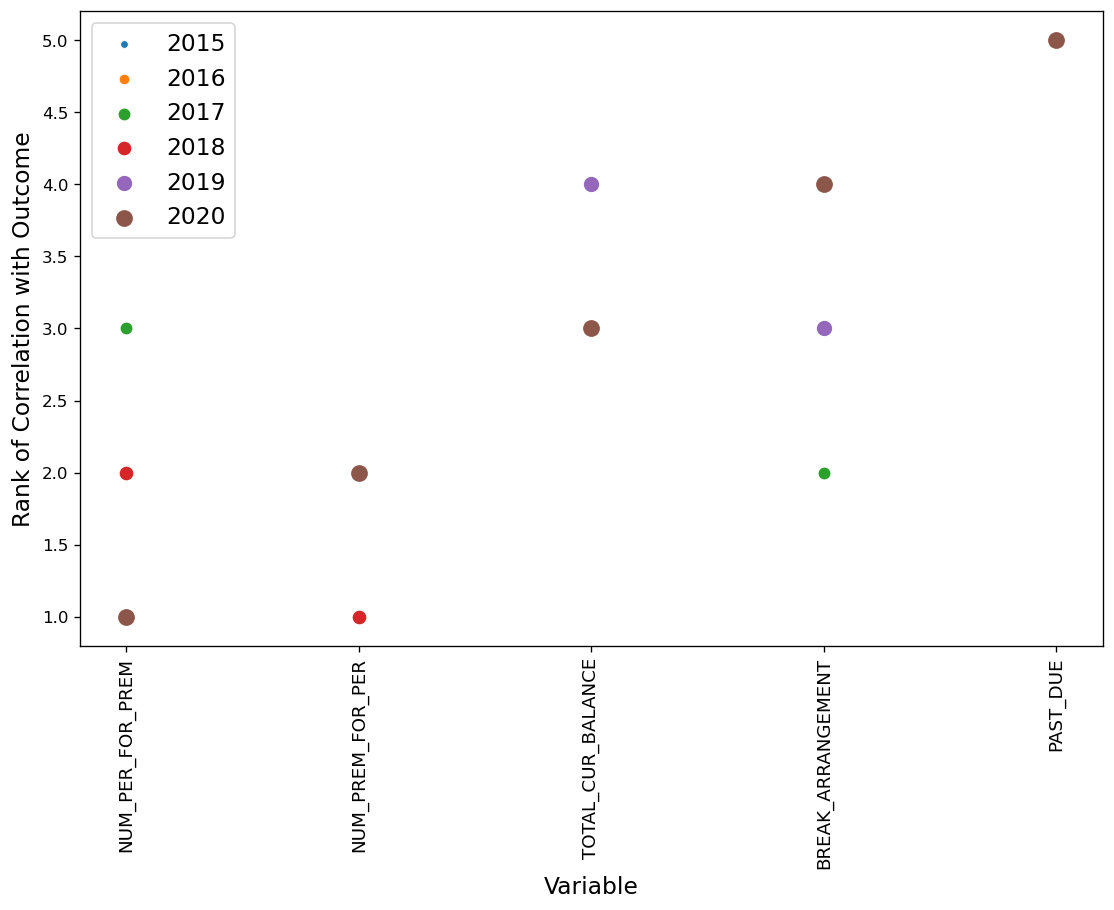

In [71]:
sns.scatterplot(x=ranks['Variable'], y=ranks[2015], label='2015', palette=visual_specs['palette'], marker='o', s=20)
sns.scatterplot(x=ranks['Variable'], y=ranks[2016], label='2016', palette=visual_specs['palette'], marker='o', s=40)
sns.scatterplot(x=ranks['Variable'], y=ranks[2017], label='2017', palette=visual_specs['palette'], marker='o', s=60)
sns.scatterplot(x=ranks['Variable'], y=ranks[2018], label='2018', palette=visual_specs['palette'], marker='o', s=80)
sns.scatterplot(x=ranks['Variable'], y=ranks[2019], label='2019', palette=visual_specs['palette'], marker='o', s=100)
sns.scatterplot(x=ranks['Variable'], y=ranks[2020], label='2020', palette=visual_specs['palette'], marker='o', s=120)

plt.xticks(rotation=90, fontsize=visual_specs['fontsize']-3)
plt.ylabel("Rank of Correlation with Outcome", fontsize=visual_specs['fontsize'])
plt.xlabel("Variable", fontsize=visual_specs['fontsize'])
plt.legend(fontsize=visual_specs['fontsize'])
plt.savefig(fname=image_dest+'corrRankByYear'+'.png', bbox_inches='tight')
plt.show();

# Which Billing Attributes to Keep?

In [24]:
#infile = open(filename,'rb')
#df = pickle.load(infile)
#infile.close()

## Group Attributes

In [25]:
avista = [
    'RES_EL_CUR120_DAYS',
    'RES_EL_CUR22_DAYS',
    'RES_EL_CUR30_DAYS',
    'RES_EL_CUR60_DAYS',
    'RES_EL_CUR90_DAYS',
    'RES_EL_CUR_BAL_AMT',
    'RES_EL_OVER_120_DAYS',
    'RES_GAS_CUR120_DAYS',
    'RES_GAS_CUR22_DAYS',
    'RES_GAS_CUR30_DAYS',
    'RES_GAS_CUR60_DAYS',
    'RES_GAS_CUR90_DAYS',
    'RES_GAS_CUR_BAL_AMT',
    'RES_GAS_OVER_120_DAYS'
]
city = [
    'CITY_TOT_DUE',
    'CITY_30_DAYS_PAST_DUE_AMT',
    'CITY_60_DAYS_PAST_DUE_AMT',
    'CITY_90_DAYS_PAST_DUE_AMT'
]
agg_avista = [
    'AVISTA_CUR120_DAYS',
    'AVISTA_OVER_120_DAYS',
    'AVISTA_CUR22_DAYS',
    'AVISTA_CUR30_DAYS',
    'AVISTA_CUR60_DAYS',
    'AVISTA_CUR90_DAYS',
    'AVISTA_CUR_BAL_AMT'
]
agg_all = [
    'TOTAL_30_DAYS_AMT',
    'TOTAL_60_DAYS_AMT',
    'TOTAL_90_DAYS_AMT',
    'TOTAL_CUR_BALANCE'
]
outcome = ['CMIS_MATCH']

## Non-Aggregated

In [26]:
corr_non_agg = point_biserial_corr(continuous=df[outcome + avista + city], binary=df['CMIS_MATCH'].to_frame()).squeeze()
corr_matrix_non_agg = df[avista + city].corr(method='spearman')
corr_non_agg.sort_values(ascending=False)

CMIS_MATCH                   1.000000
RES_EL_CUR60_DAYS            0.050711
RES_EL_CUR_BAL_AMT           0.040851
RES_EL_CUR90_DAYS            0.038702
CITY_60_DAYS_PAST_DUE_AMT    0.035285
RES_GAS_CUR60_DAYS           0.034360
CITY_30_DAYS_PAST_DUE_AMT    0.030721
RES_GAS_CUR90_DAYS           0.027191
RES_EL_CUR30_DAYS            0.026849
RES_EL_CUR120_DAYS           0.023597
CITY_TOT_DUE                 0.019331
RES_GAS_CUR_BAL_AMT          0.018369
RES_GAS_CUR30_DAYS           0.017646
RES_GAS_CUR120_DAYS          0.016303
RES_EL_CUR22_DAYS            0.014092
RES_EL_OVER_120_DAYS         0.011516
CITY_90_DAYS_PAST_DUE_AMT    0.009320
RES_GAS_CUR22_DAYS           0.002146
RES_GAS_OVER_120_DAYS        0.001231
Name: CMIS_MATCH, dtype: float64

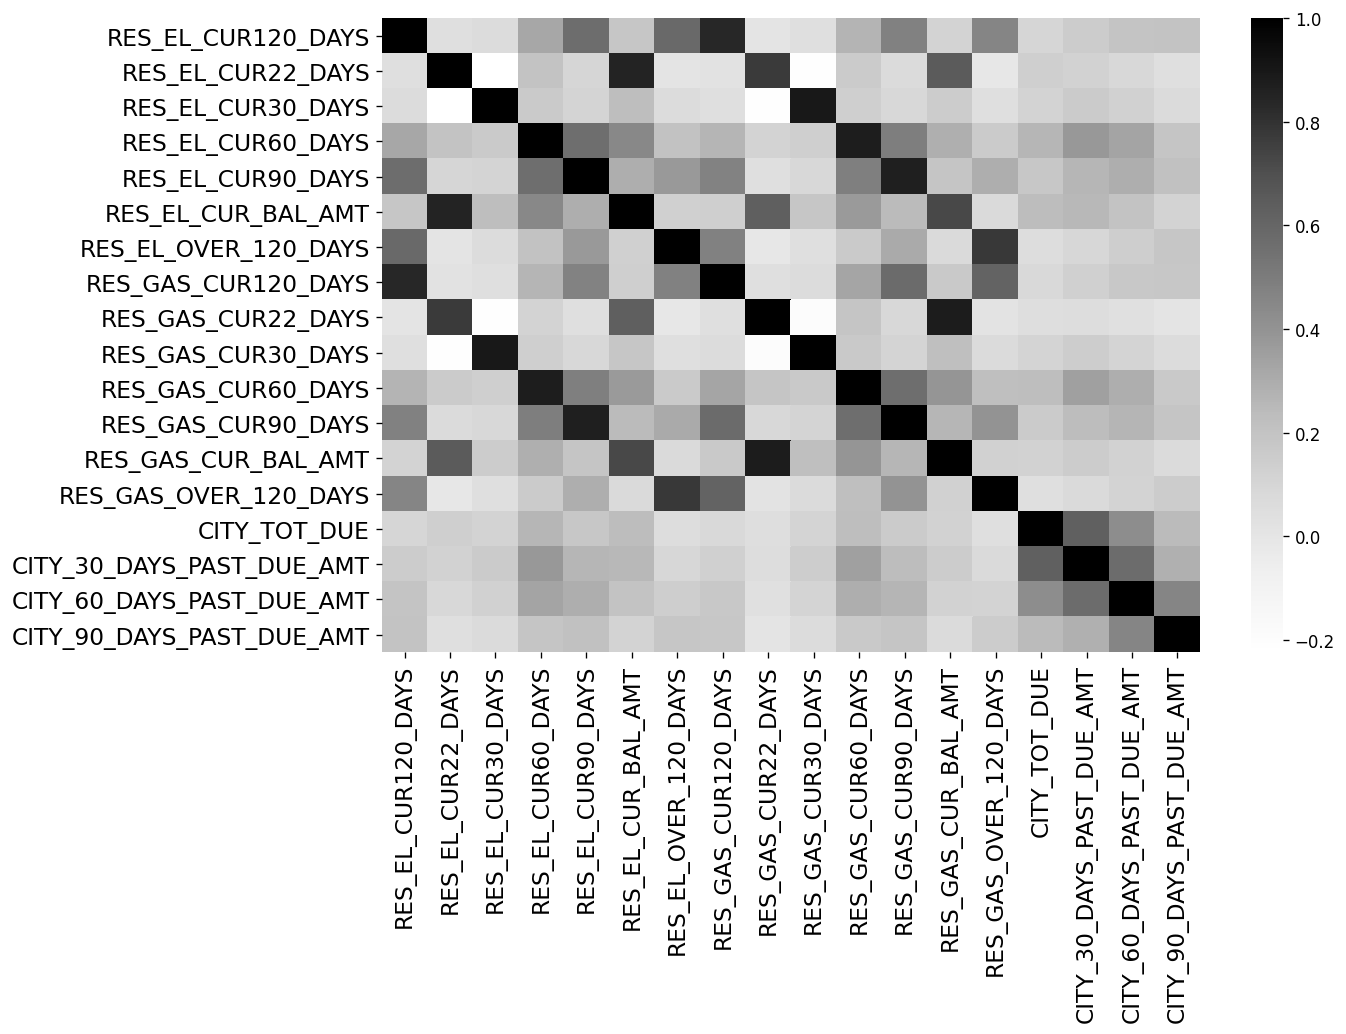

In [91]:
plot_heatmap(
    corr=corr_matrix_non_agg, 
    visual_specs=visual_specs, 
    fname='assocBillNonAgg', 
    image_dest=image_dest,
    annot=False
)

## Avista Aggregated

In [28]:
corr_avista_agg = point_biserial_corr(continuous=df[agg_avista + city], binary=df['CMIS_MATCH'].to_frame()).squeeze()
corr_matrix_avista_agg = df[agg_avista + city].corr(method='spearman')
corr_avista_agg.sort_values(ascending=False)

AVISTA_CUR60_DAYS            0.050836
AVISTA_CUR_BAL_AMT           0.045968
AVISTA_CUR90_DAYS            0.039492
CITY_60_DAYS_PAST_DUE_AMT    0.035285
CITY_30_DAYS_PAST_DUE_AMT    0.030721
AVISTA_CUR30_DAYS            0.026347
AVISTA_CUR120_DAYS           0.024400
CITY_TOT_DUE                 0.019331
AVISTA_CUR22_DAYS            0.012481
CITY_90_DAYS_PAST_DUE_AMT    0.009320
AVISTA_OVER_120_DAYS         0.006089
Name: CMIS_MATCH, dtype: float64

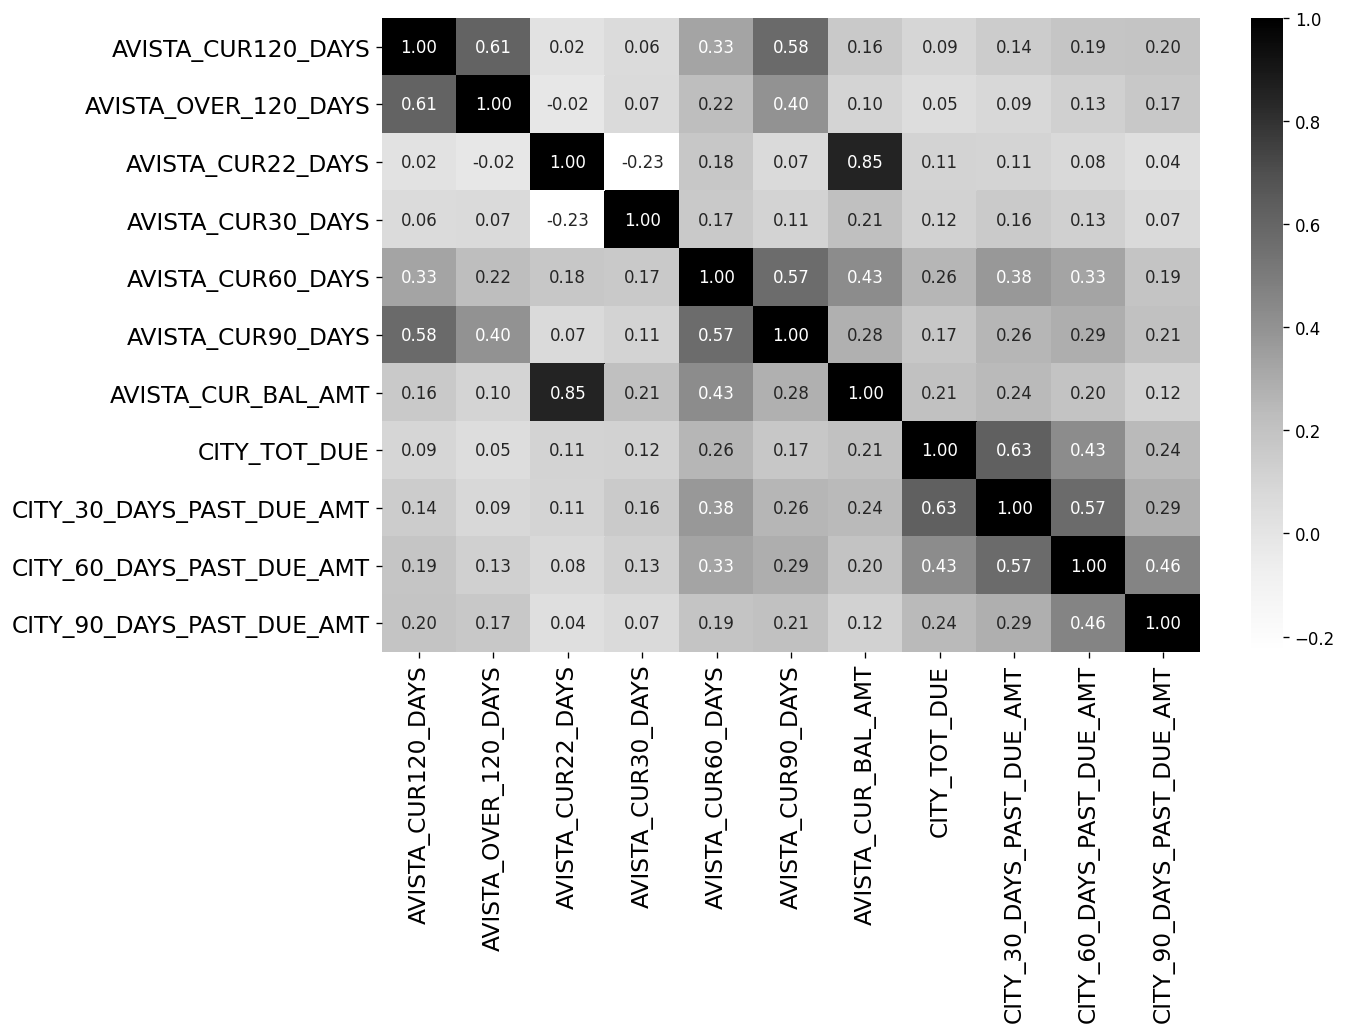

In [88]:
plot_heatmap(
    corr=corr_matrix_avista_agg, 
    visual_specs=visual_specs, 
    fname='assocBillAvistaAgg', 
    image_dest=image_dest,
    fmt='.2f',
    annot=True
)

## Aggregate Avista and City

In [31]:
corr_all_agg = point_biserial_corr(continuous=df[agg_all], binary=df['CMIS_MATCH'].to_frame()).squeeze()
corr_matrix_all_agg = df[agg_all].corr(method='spearman')
corr_all_agg.sort_values(ascending=False)

TOTAL_60_DAYS_AMT    0.056296
TOTAL_CUR_BALANCE    0.042064
TOTAL_30_DAYS_AMT    0.038237
TOTAL_90_DAYS_AMT    0.016149
Name: CMIS_MATCH, dtype: float64

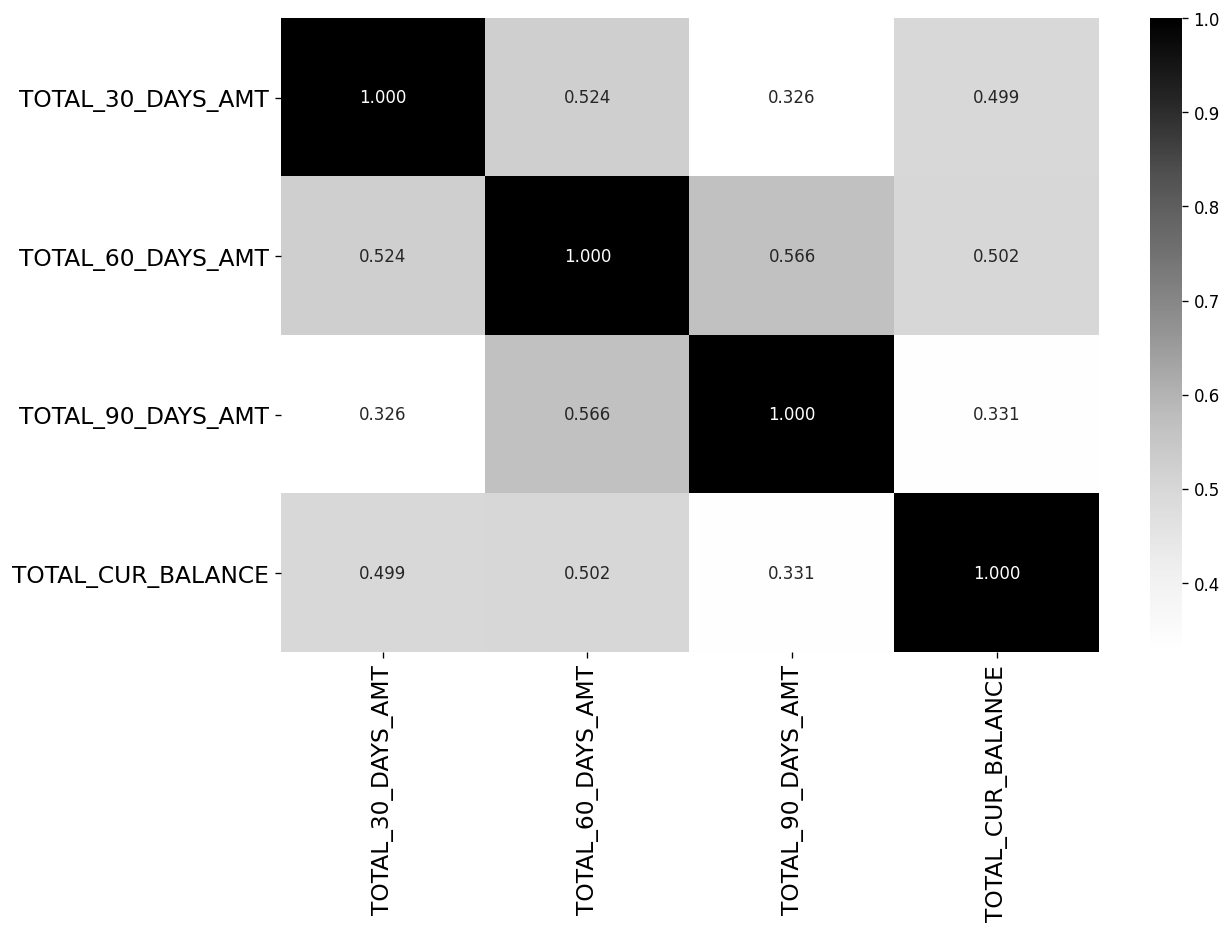

In [32]:
plot_heatmap(
    corr=corr_matrix_all_agg, 
    visual_specs=visual_specs, 
    fname='assocBillAllAgg', 
    image_dest=image_dest,
    annot=True
)

## Conclusion
* TOTAL_60_DAYS_AMT most correlated with MO_AWAY

# Which Other Attributes to Use?

## Group Attributes

In [33]:
#infile = open(filename,'rb')
#df = pickle.load(infile)
#infile.close()
#df.columns.to_list()

In [5]:
to_drop = [
    'RES_EL_CUR120_DAYS',
    'RES_EL_CUR22_DAYS',
    'RES_EL_CUR30_DAYS',
    'RES_EL_CUR60_DAYS',
    'RES_EL_CUR90_DAYS',
    'RES_EL_CUR_BAL_AMT',
    'RES_EL_OVER_120_DAYS',
    'RES_GAS_CUR120_DAYS',
    'RES_GAS_CUR22_DAYS',
    'RES_GAS_CUR30_DAYS',
    'RES_GAS_CUR60_DAYS',
    'RES_GAS_CUR90_DAYS',
    'RES_GAS_CUR_BAL_AMT',
    'RES_GAS_OVER_120_DAYS',
    'CITY_TOT_DUE',
    'CITY_30_DAYS_PAST_DUE_AMT',
    'CITY_60_DAYS_PAST_DUE_AMT',
    'CITY_90_DAYS_PAST_DUE_AMT',
    'AVISTA_CUR120_DAYS',
    'AVISTA_OVER_120_DAYS',
    'AVISTA_CUR22_DAYS',
    'AVISTA_CUR30_DAYS',
    'AVISTA_CUR60_DAYS',
    'AVISTA_CUR90_DAYS',
    'AVISTA_CUR_BAL_AMT',
    'TOTAL_30_DAYS_AMT',
    # 'TOTAL_60_DAYS_AMT',
    'TOTAL_90_DAYS_AMT',
    'TOTAL_CUR_BALANCE'
]
numerical0 = [x for x in numerical_cols if x not in to_drop]

## Categorical Attributes

In [6]:
associations?

C:\Users\Colin\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:4321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


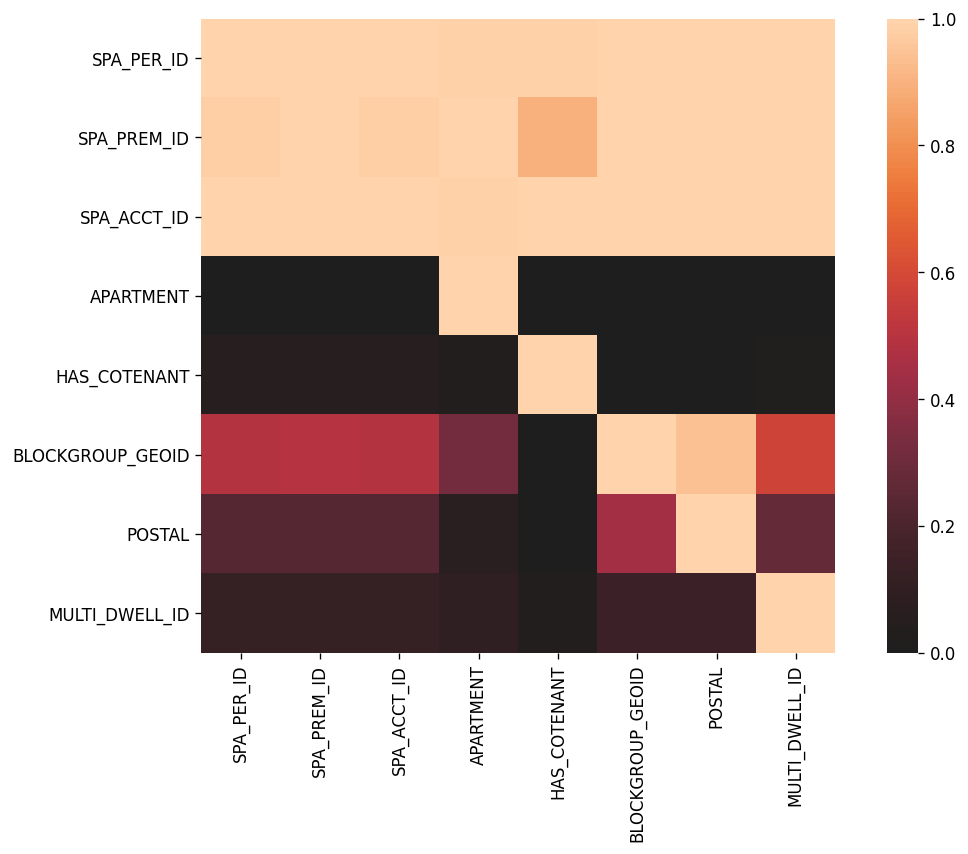

In [7]:
assoc_cat = associations(df[categorical_cols], theil_u=True, nominal_columns='all', annot=False)['corr']

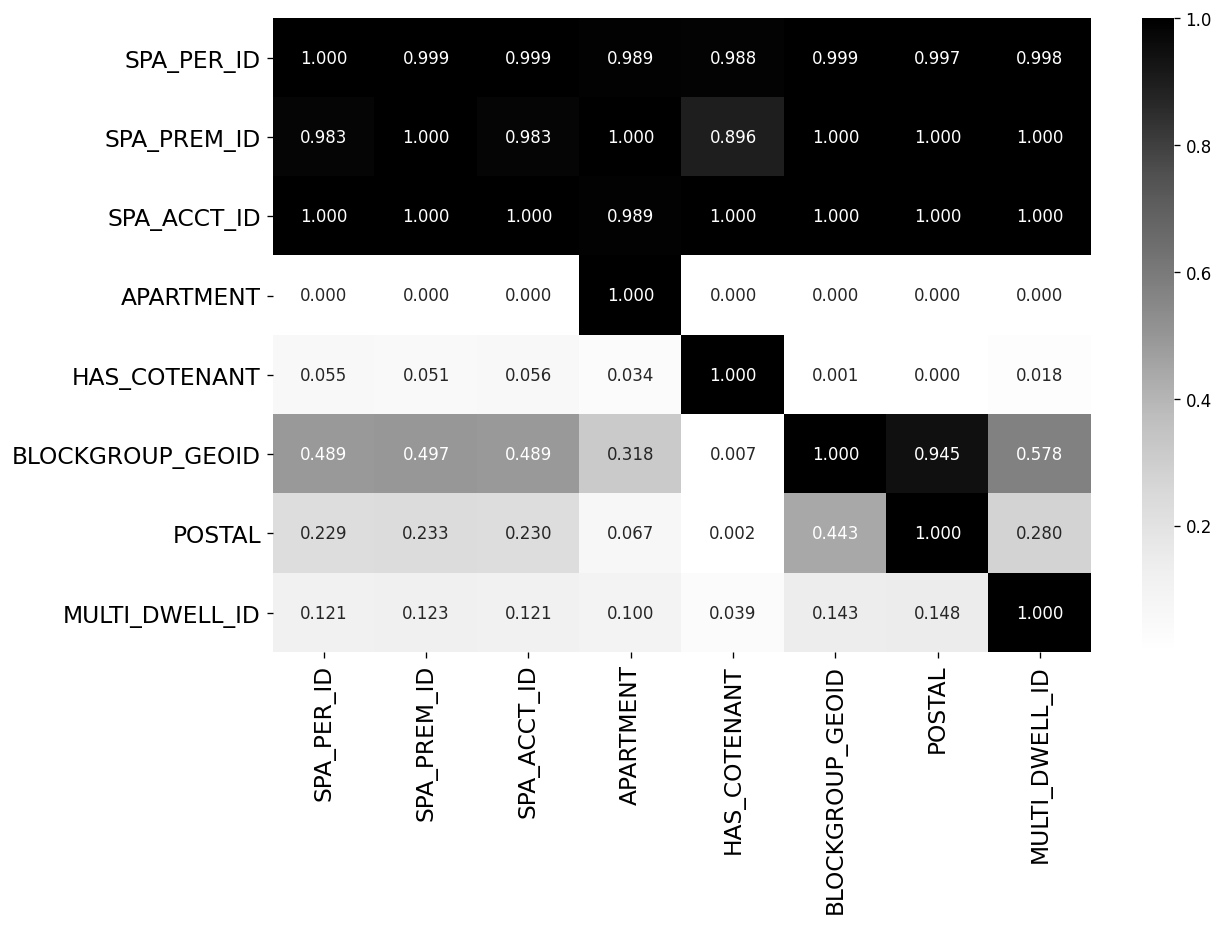

In [9]:
plot_heatmap(
    corr=assoc_cat, 
    visual_specs=visual_specs, 
    fname='assoc_cat', 
    image_dest=image_dest,
    annot=True
)

In [38]:
print(assoc_cat.to_latex(caption='', label='', longtable=True))

\begin{longtable}{lrrrrrrrr}
\caption{}\label{}\\
\toprule
{} &  SPA\_PER\_ID &  SPA\_PREM\_ID &  SPA\_ACCT\_ID &  APARTMENT &  HAS\_COTENANT &  BLOCKGROUP\_GEOID &    POSTAL &  MULTI\_DWELL\_ID \\
\midrule
\endhead
\midrule
\multicolumn{9}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
SPA\_PER\_ID       &    1.000000 &    -0.007392 &    -0.005497 &  -0.002476 &      0.005927 &         -0.000351 &  0.000217 &       -0.002726 \\
SPA\_PREM\_ID      &   -0.007392 &     1.000000 &     0.654549 &   0.006159 &      0.001999 &          0.168566 & -0.068247 &        0.133015 \\
SPA\_ACCT\_ID      &   -0.005497 &     0.654549 &     1.000000 &   0.006191 &      0.010395 &          0.104519 & -0.042444 &        0.077312 \\
APARTMENT        &   -0.002476 &     0.006159 &     0.006191 &   1.000000 &     -0.008070 &          0.004621 &  0.002556 &       -0.003471 \\
HAS\_COTENANT     &    0.005927 &     0.001999 &     0.010395 &  -0.008070 &      1.000000 &          0.0

### Conclusion
* SPA_ACCT_ID is strongly associated with SPA_PREM_ID - should not predict on either of these, anyway  
* SPA_ACCT_ID not strongly associated with SPA_PER_ID  
* POSTAL not strongly associated with SPA_PREM_ID or BLOCKGROUP_GEOID - surprising

In [40]:
categorical0 = categorical_cols
categorical0.remove('SPA_ACCT_ID')
categorical0.remove('SPA_PREM_ID')

## Numerical Attributes

In [41]:
assoc_num = abs(df[numerical0].corr(method='spearman'))

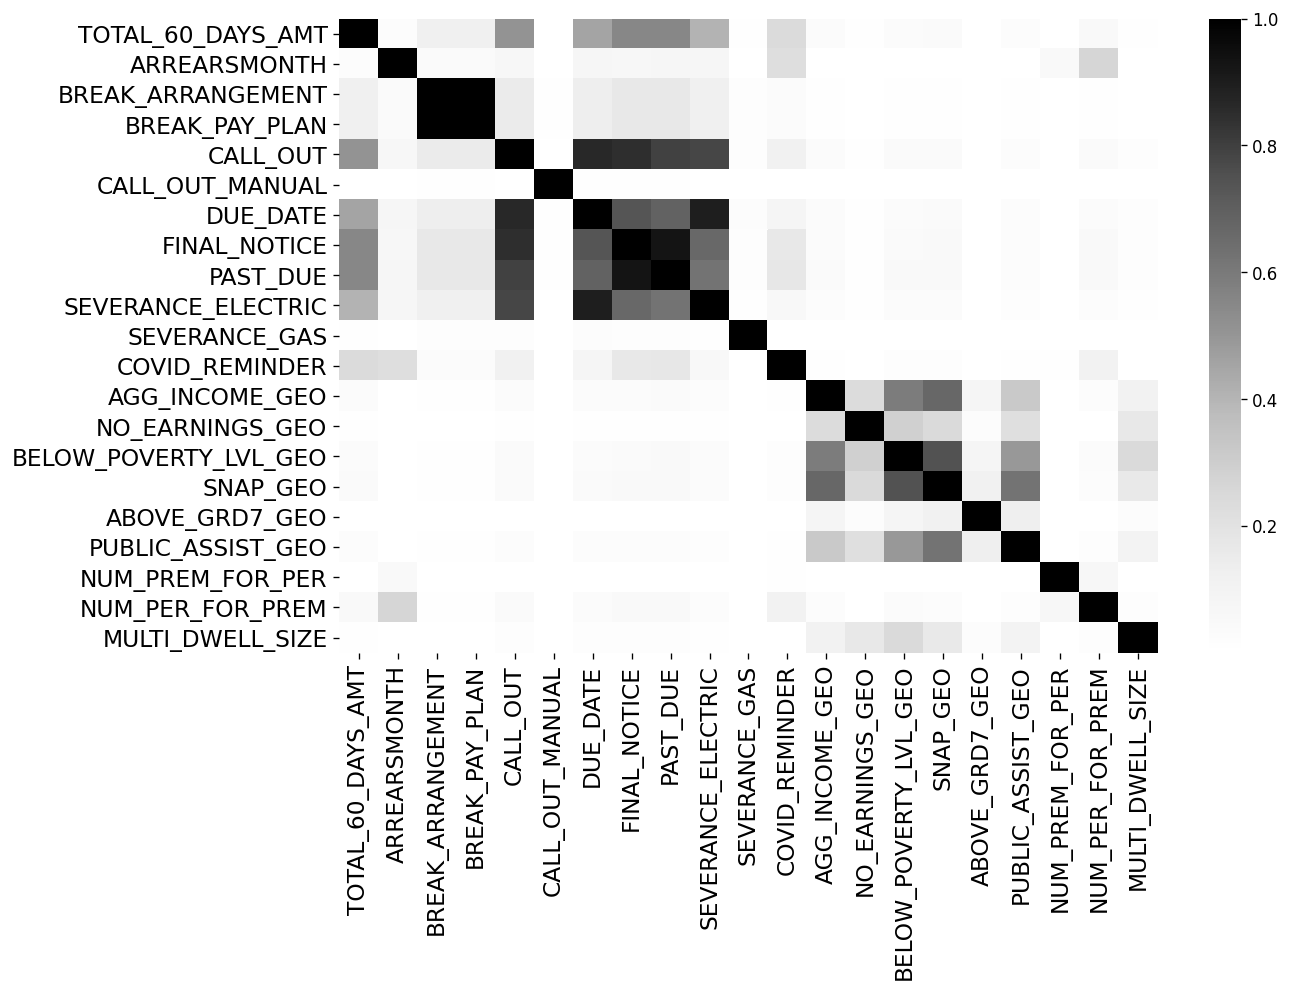

In [90]:
plot_heatmap(
    corr=assoc_num, 
    visual_specs=visual_specs, 
    fname='assocNum', 
    image_dest=image_dest,
    annot=False
)

In [43]:
print(assoc_num.loc['CALL_OUT':'SEVERANCE_ELECTRIC', 'CALL_OUT':'SEVERANCE_ELECTRIC'].to_latex(caption='', label='', longtable=True))

\begin{longtable}{lrrrrrr}
\caption{}\label{}\\
\toprule
{} &  CALL\_OUT &  CALL\_OUT\_MANUAL &  DUE\_DATE &  FINAL\_NOTICE &  PAST\_DUE &  SEVERANCE\_ELECTRIC \\
\midrule
\endhead
\midrule
\multicolumn{7}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
CALL\_OUT           &  1.000000 &         0.006751 &  0.863433 &      0.848731 &  0.793207 &            0.782457 \\
CALL\_OUT\_MANUAL    &  0.006751 &         1.000000 &  0.008467 &      0.011363 &  0.010536 &            0.007291 \\
DUE\_DATE           &  0.863433 &         0.008467 &  1.000000 &      0.735120 &  0.689858 &            0.897803 \\
FINAL\_NOTICE       &  0.848731 &         0.011363 &  0.735120 &      1.000000 &  0.929927 &            0.665795 \\
PAST\_DUE           &  0.793207 &         0.010536 &  0.689858 &      0.929927 &  1.000000 &            0.624916 \\
SEVERANCE\_ELECTRIC &  0.782457 &         0.007291 &  0.897803 &      0.665795 &  0.624916 &            1.000000 \\
\end{longtable}



### Conclusion
* all associated, choose one: ['BREAK_ARRANGEMENT','BREAK_PAY_PLAN']  
* all associated, choose one: ['CALL_OUT','DUE_DATE','FINAL_NOTICE','PAST_DUE','SEVERANCE_ELECTRIC']  
* all associated, choose one: ['AGG_INCOME_GEO','BELOW_POVERTY_LVL_GEO','SNAP_GEO','PUBLIC_ASSIST_GEO']

## Reduce variables

In [44]:
assoc_match_num = point_biserial_corr(continuous=df[numerical0], binary=df['CMIS_MATCH'].to_frame()).squeeze()
assoc_match_num.sort_values(ascending=False)

PAST_DUE                 0.065804
FINAL_NOTICE             0.064388
CALL_OUT                 0.059713
DUE_DATE                 0.059259
TOTAL_60_DAYS_AMT        0.056296
SEVERANCE_ELECTRIC       0.055246
NUM_PREM_FOR_PER         0.026121
BREAK_ARRANGEMENT        0.023394
BREAK_PAY_PLAN           0.023394
COVID_REMINDER           0.010951
MULTI_DWELL_SIZE         0.006827
SNAP_GEO                 0.006242
BELOW_POVERTY_LVL_GEO    0.005974
PUBLIC_ASSIST_GEO        0.004826
NUM_PER_FOR_PREM         0.001542
NO_EARNINGS_GEO          0.000981
CALL_OUT_MANUAL         -0.000215
SEVERANCE_GAS           -0.000336
AGG_INCOME_GEO          -0.000510
ABOVE_GRD7_GEO          -0.001614
ARREARSMONTH            -0.017234
Name: CMIS_MATCH, dtype: float64

In [45]:
keep_so_far_num = [
    'PAST_DUE',
    'TOTAL_60_DAYS_AMT',
    'NUM_PREM_FOR_PER',
    'BREAK_ARRANGEMENT',
    'COVID_REMINDER',
    'MULTI_DWELL_SIZE',
    'SNAP_GEO',
    'NUM_PER_FOR_PREM'
]

## Categorical - Numerical

In [46]:
# CAUTION: THIS TAKES A LONG TIME TO EXECUTE
assoc_cat_num = correlation_ratios(categorical=df[categorical0], continuous=df[keep_so_far_num])

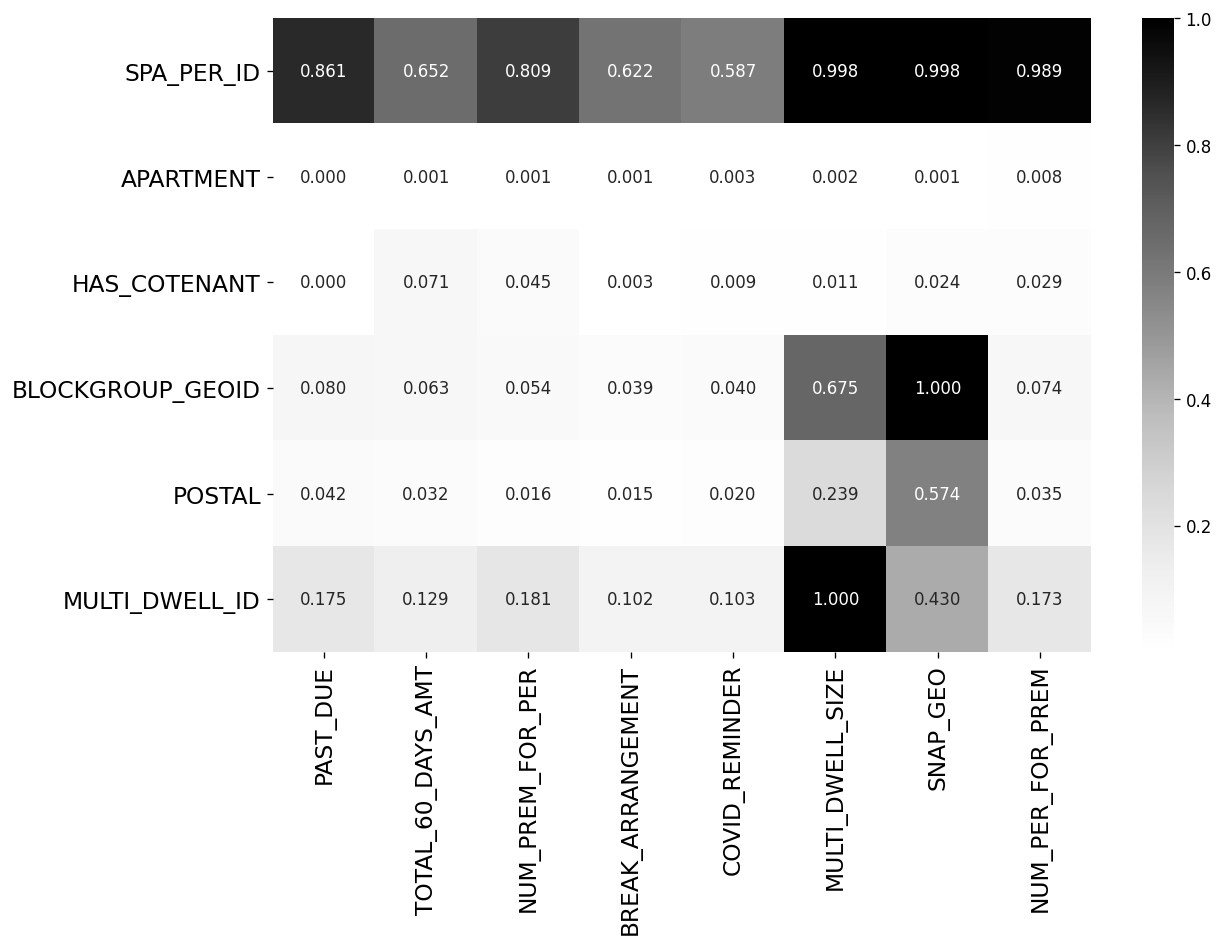

In [47]:
plot_heatmap(
    corr=assoc_cat_num, 
    visual_specs=visual_specs, 
    fname='assoc_cat_num', 
    image_dest=image_dest,
    annot=True
)

In [48]:
print(assoc_cat_num.transpose().to_latex(caption='', label='', longtable=True))

\begin{longtable}{lrrrrrr}
\caption{}\label{}\\
\toprule
{} &  SPA\_PER\_ID &  APARTMENT &  HAS\_COTENANT &  BLOCKGROUP\_GEOID &    POSTAL &  MULTI\_DWELL\_ID \\
\midrule
\endhead
\midrule
\multicolumn{7}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
PAST\_DUE          &    0.860528 &   0.000229 &      0.000075 &          0.079873 &  0.042204 &        0.174893 \\
TOTAL\_60\_DAYS\_AMT &    0.652301 &   0.001120 &      0.070547 &          0.062745 &  0.032219 &        0.129342 \\
NUM\_PREM\_FOR\_PER  &    0.808500 &   0.000993 &      0.045414 &          0.054200 &  0.015795 &        0.180600 \\
BREAK\_ARRANGEMENT &    0.622289 &   0.000968 &      0.002808 &          0.038701 &  0.015044 &        0.101610 \\
COVID\_REMINDER    &    0.586980 &   0.002910 &      0.009023 &          0.039991 &  0.019634 &        0.102866 \\
MULTI\_DWELL\_SIZE  &    0.997650 &   0.002266 &      0.010704 &          0.674983 &  0.239496 &        1.000000 \\
SNAP\_GEO          &    

### Conclusion
* choose either ['MULTI_DWELL_SIZE', 'SNAP_GEO'] or ['BLOCKGROUP_GEOID','POSTAL','MULTI_DWELL_ID']  

## Choose Which to Keep

In [49]:
to_remove = [
    'SPA_PER_ID',
    'BLOCKGROUP_GEOID',
    'POSTAL',
    'MULTI_DWELL_ID',
]
keep = keep_so_far_num + categorical0
for var in to_remove:
    keep.remove(var)
keep

['PAST_DUE',
 'TOTAL_60_DAYS_AMT',
 'NUM_PREM_FOR_PER',
 'BREAK_ARRANGEMENT',
 'COVID_REMINDER',
 'MULTI_DWELL_SIZE',
 'SNAP_GEO',
 'NUM_PER_FOR_PREM',
 'APARTMENT',
 'HAS_COTENANT']

In [50]:
keep_print = pd.Series(keep)
print(keep_print.to_latex())

\begin{tabular}{ll}
\toprule
{} &                  0 \\
\midrule
0 &           PAST\_DUE \\
1 &  TOTAL\_60\_DAYS\_AMT \\
2 &   NUM\_PREM\_FOR\_PER \\
3 &  BREAK\_ARRANGEMENT \\
4 &     COVID\_REMINDER \\
5 &   MULTI\_DWELL\_SIZE \\
6 &           SNAP\_GEO \\
7 &   NUM\_PER\_FOR\_PREM \\
8 &          APARTMENT \\
9 &       HAS\_COTENANT \\
\bottomrule
\end{tabular}



In [51]:
#filename = '../../002_Data/Release_4/attribute_list.pickle'
#outfile = open(filename, 'wb')
#pickle.dump(keep, outfile)
#outfile.close()

# Data Imbalance

In [54]:
attribute = "CMIS_MATCH"
print(attribute)
print("People")
print(f"P: {df[df[attribute]].SPA_PER_ID.nunique()}")
print(f"N: {df[~df[attribute]].SPA_PER_ID.nunique()}")
print("Rows")
print(f"P: {len(df[df[attribute]])}")
print(f"N: {len(df[~df[attribute]])}")

print()
attribute = "LAST_MO_W_DATA"
print(attribute)
print("People")
print(f"P: {df[df[attribute]].SPA_PER_ID.nunique()}")
print(f"N: {df[~df[attribute]].SPA_PER_ID.nunique()}")
print("Rows")
print(f"P: {len(df[df[attribute]])}")
print(f"N: {len(df[~df[attribute]])}")

CMIS_MATCH
People
P: 302
N: 85192
Rows
P: 8946
N: 3337330

LAST_MO_W_DATA
People
P: 302
N: 85490
Rows
P: 302
N: 3345974


# Time and Events

In [55]:
#infile = open(filename,'rb')
#df = pickle.load(infile)
#infile.close()
#df.columns.to_list()

In [56]:
to_keep = [
    'SPA_PER_ID',
    'SPA_PREM_ID',
    'ARREARSMONTH',
    'CMIS_MATCH',
    'MO_AWAY',
    'WITHIN_6_MO_PRIOR_LAST_DATA',
    'LAST_MO_W_DATA'
]
df_later = df[to_keep]

## Do we always have data on people at CMIS_DB_ENTRY? - NO
Does MO_AWAY never get to 0 for some people?

In [57]:
df_later = df_later.join(df_later.groupby('SPA_PER_ID').agg('min')['MO_AWAY'].rename('MIN_MO_AWAY'),how='left', on='SPA_PER_ID')
df_later = df_later[df_later['MIN_MO_AWAY'] > 0]
print(f"Number of P Cases we do not have data on at CMIS program entry: {df_later['SPA_PER_ID'].nunique()} = {df_later['SPA_PER_ID'].nunique() / df[df.CMIS_MATCH]['SPA_PER_ID'].nunique()}")
del df_later

Number of P Cases we do not have data on at CMIS program entry: 85192 = 282.0927152317881


## Conclusion:
CMIS_DB_ENTRY likely not useful - do not have data on many people at time of enrollment

# Compare P and N

In [58]:
#infile = open(filename,'rb')
#df = pickle.load(infile)
#infile.close()

In [69]:
'''
def pop_proportion(pos:pd.DataFrame, neg:pd.DataFrame, attribute:str, visual_specs:dict, image_dest:str=None, xlim:tuple=None, bins:int=30):
    ''
    05/20/21
    prints description of P, N cases on "attribute", then plots split probability histogram of P, N subpopulations on "attribute"
    saves plot if "image_dest" is defined
    ''
    fontsize = visual_specs['fontsize']
    palette = visual_specs['palette']
    saturation= visual_specs['saturation']
    
    upper = max(pos[attribute].max(), neg[attribute].max())
    lower = min(pos[attribute].min(), neg[attribute].min())
    bins = pd.Series(np.linspace(lower, upper, bins), name='bin_bounds')

    pos_prob = (pd.cut(pos[attribute], bins=bins, duplicates='drop', ordered=False, include_lowest=True, labels=bins.iloc[:-1].round(1)).\
        value_counts().rename('prob') / len(pos)).to_frame().reset_index()
    pos_prob['Class'] = 'Positive'

    neg_prob = (pd.cut(neg[attribute], bins=bins, duplicates='drop', ordered=False, include_lowest=True, labels=bins.iloc[:-1].round(1)).\
        value_counts().rename('prob') / len(neg)).to_frame().reset_index()
    neg_prob['Class'] = 'Negative'

    all_prob = pos_prob
    all_prob = all_prob.append(neg_prob).rename({'index':'bin'}, axis=1)

    sns.barplot(
        data=all_prob, 
        x='bin', 
        y='prob',
        hue='Class',
        palette=palette,
        saturation=saturation
    )

    plt.ylabel('Proportion of Subpopulation', fontsize=fontsize)
    plt.yticks(fontsize=fontsize-2)
    plt.xlabel(attribute, fontsize=fontsize)
    plt.xticks(fontsize=fontsize-2, rotation=90)
    plt.legend(fontsize=fontsize)
    plt.xlim(xlim)
    
    if not (image_dest is None):
         plt.savefig(image_dest + 'PN_on'+ attribute + '.png', dpi=300, bbox_inches='tight')
    return
'''

## Based on CMIS_MATCH

In [8]:
pos = df[df.CMIS_MATCH]
neg = df[~df.CMIS_MATCH]

In [47]:
attribute_list = ['PAST_DUE', 'TOTAL_60_DAYS_AMT', 'NUM_PREM_FOR_PER', 'CMIS_MATCH']
for_printing = df[df.CMIS_MATCH][attribute_list].describe().loc[['mean', 'std', 'min', '50%', 'max']]
idx = ['Positive']*len(for_printing)
for_printing['Class'] = idx
for_printing = for_printing.append(df[~df.CMIS_MATCH][attribute_list].describe().loc[['mean', 'std', 'min', '50%', 'max']]).fillna('Negative')
for_printing = for_printing.reset_index().rename({'index':'Statistic'}, axis=1).set_index(['Class', 'Statistic']).round(2)
print(for_printing.to_latex())

\begin{tabular}{llrrr}
\toprule
         &     &  PAST\_DUE &  TOTAL\_60\_DAYS\_AMT &  NUM\_PREM\_FOR\_PER \\
Class & Statistic &           &                    &                   \\
\midrule
Positive & mean &      2.36 &             120.88 &              1.05 \\
         & std &      2.67 &             214.38 &              0.21 \\
         & min &      0.00 &             -59.39 &              1.00 \\
         & 50\% &      1.00 &               0.55 &              1.00 \\
         & max &     11.00 &            4173.19 &              2.00 \\
Negative & mean &      0.49 &              26.04 &              1.01 \\
         & std &      1.45 &              86.26 &              0.08 \\
         & min &      0.00 &           -5183.36 &              1.00 \\
         & 50\% &      0.00 &               0.00 &              1.00 \\
         & max &     25.00 &            6885.00 &              2.00 \\
\bottomrule
\end{tabular}



In [8]:
for_printing = df[['PAST_DUE', 'TOTAL_60_DAYS_AMT', 'BREAK_ARRANGEMENT']].describe().loc[['mean', 'std', 'min', '50%', 'max']].round(2)
print(for_printing.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  PAST\_DUE &  TOTAL\_60\_DAYS\_AMT &  BREAK\_ARRANGEMENT \\
\midrule
mean &      0.50 &              26.29 &               0.01 \\
std  &      1.46 &              86.99 &               0.10 \\
min  &      0.00 &           -5183.36 &               0.00 \\
50\%  &      0.00 &               0.00 &               0.00 \\
max  &     25.00 &            6885.00 &               4.00 \\
\bottomrule
\end{tabular}



In [6]:
print(df.PAST_DUE.max())
print(df.PAST_DUE.min())

25
0


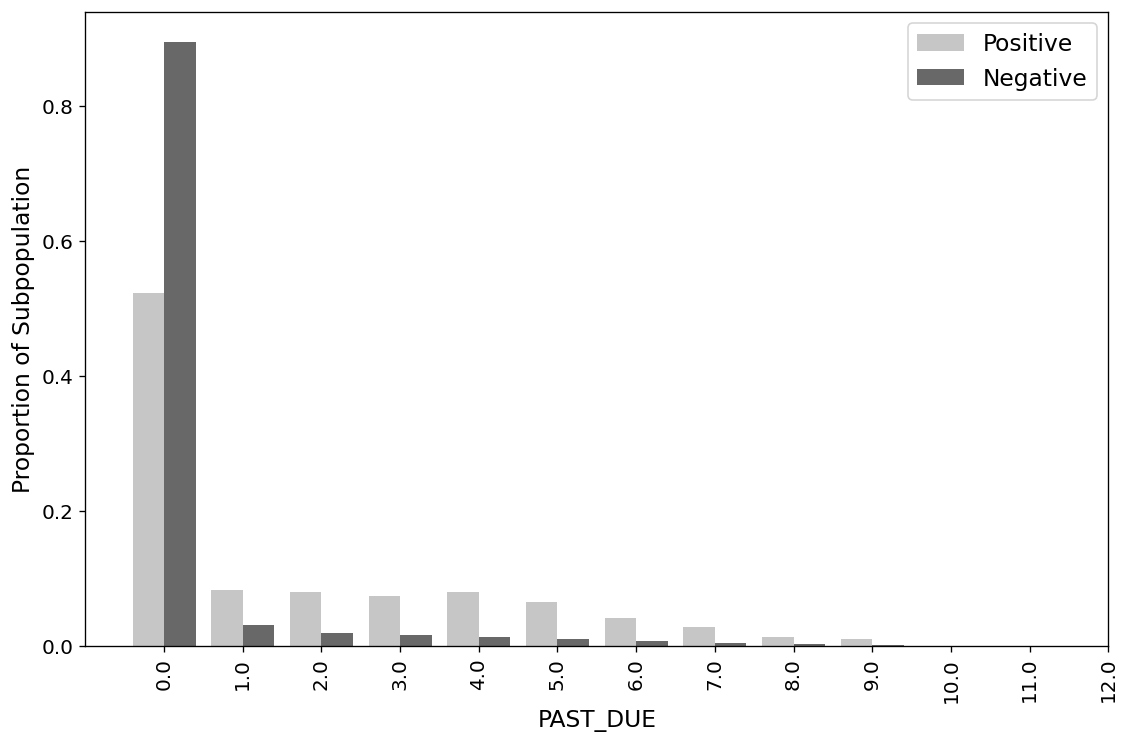

In [10]:
attribute = 'PAST_DUE'
pop_proportion(pos=pos, 
               neg=neg, 
               attribute=attribute, 
               xlim=(-1,12), 
               visual_specs=visual_specs, 
               bins=26,
               image_dest=image_dest
)

No handles with labels found to put in legend.


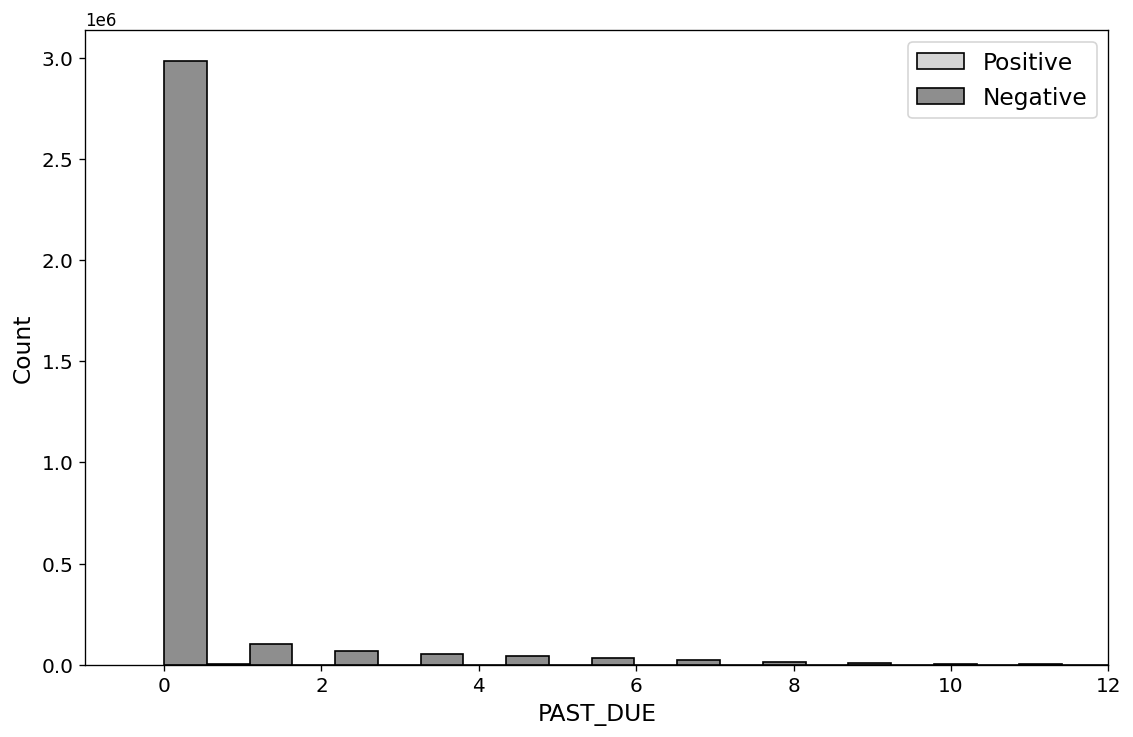

In [21]:
sns.histplot(data=df, x='PAST_DUE', hue='CMIS_MATCH', multiple="dodge", palette='Greys_r')

fontsize = visual_specs['fontsize']

plt.xlim(-1,12)
plt.ylabel('Count', fontsize=fontsize)
plt.yticks(fontsize=fontsize-2)
plt.xlabel('PAST_DUE', fontsize=fontsize)
plt.xticks(fontsize=fontsize-2)
plt.legend(fontsize=fontsize)
plt.legend(labels=['Positive', 'Negative'], fontsize=fontsize)
plt.savefig(fname=image_dest+'PN_count_on_PAST_DUE.png', dpi=300, bbox_inches='tight')

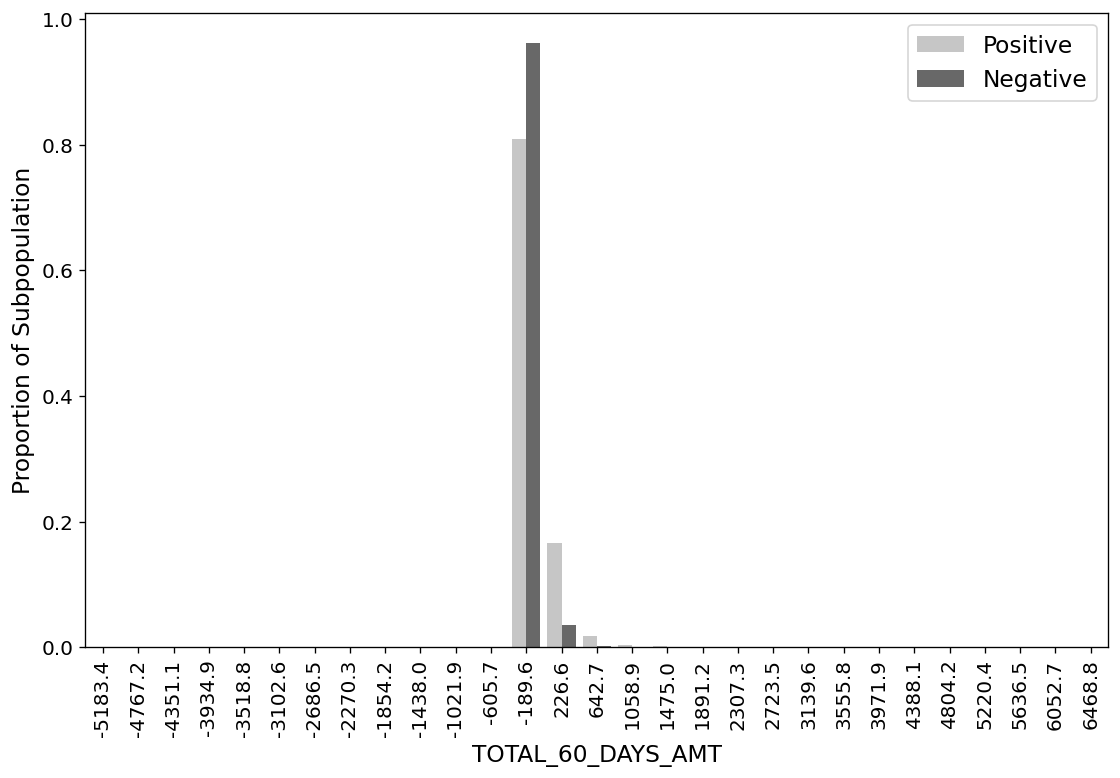

In [11]:
attribute = 'TOTAL_60_DAYS_AMT'
pop_proportion(pos=pos, 
               neg=neg, attribute=attribute, 
               #xlim=(11,15), 
               visual_specs=visual_specs,
                #image_dest=image_dest
              )

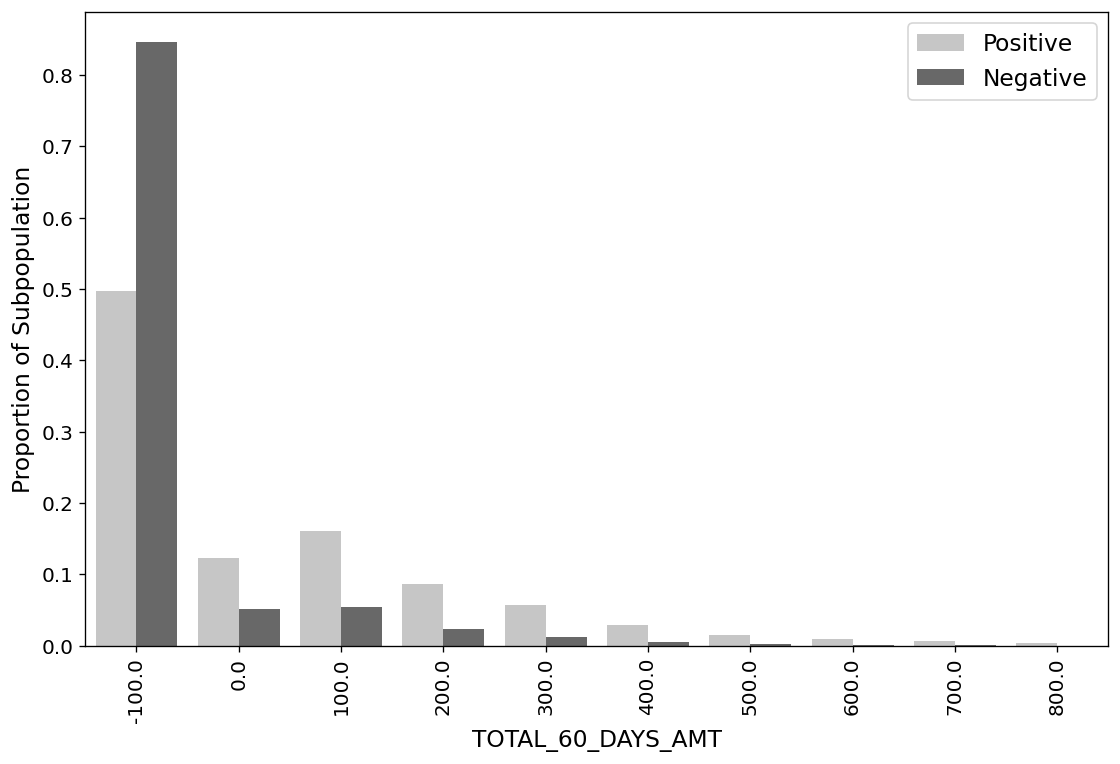

In [17]:
attribute = 'TOTAL_60_DAYS_AMT'

fontsize = visual_specs['fontsize']
palette = visual_specs['palette']
saturation= visual_specs['saturation']
bins = pd.Series(np.linspace(-100, 900, 11), name='bin_bounds')

pos_prob = (pd.cut(pos[attribute], bins=bins, duplicates='drop', ordered=False, include_lowest=True, labels=bins.iloc[:-1].round(1)).\
    value_counts().rename('prob') / len(pos)).to_frame().reset_index()
pos_prob['Class'] = 'Positive'

neg_prob = (pd.cut(neg[attribute], bins=bins, duplicates='drop', ordered=False, include_lowest=True, labels=bins.iloc[:-1].round(1)).\
    value_counts().rename('prob') / len(neg)).to_frame().reset_index()
neg_prob['Class'] = 'Negative'

all_prob = pos_prob
all_prob = all_prob.append(neg_prob).rename({'index':'bin'}, axis=1)

sns.barplot(
    data=all_prob, 
    x='bin', 
    y='prob',
    hue='Class',
    palette=palette,
    saturation=saturation
)

plt.ylabel('Proportion of Subpopulation', fontsize=fontsize)
plt.yticks(fontsize=fontsize-2)
plt.xlabel(attribute, fontsize=fontsize)
plt.xticks(fontsize=fontsize-2, rotation=90)
plt.legend(fontsize=fontsize)
#plt.xlim(xlim)

plt.savefig(image_dest + 'PN_on'+ attribute + '.png', dpi=300, bbox_inches='tight')


In [33]:
plt.Axes.set_xlabel?

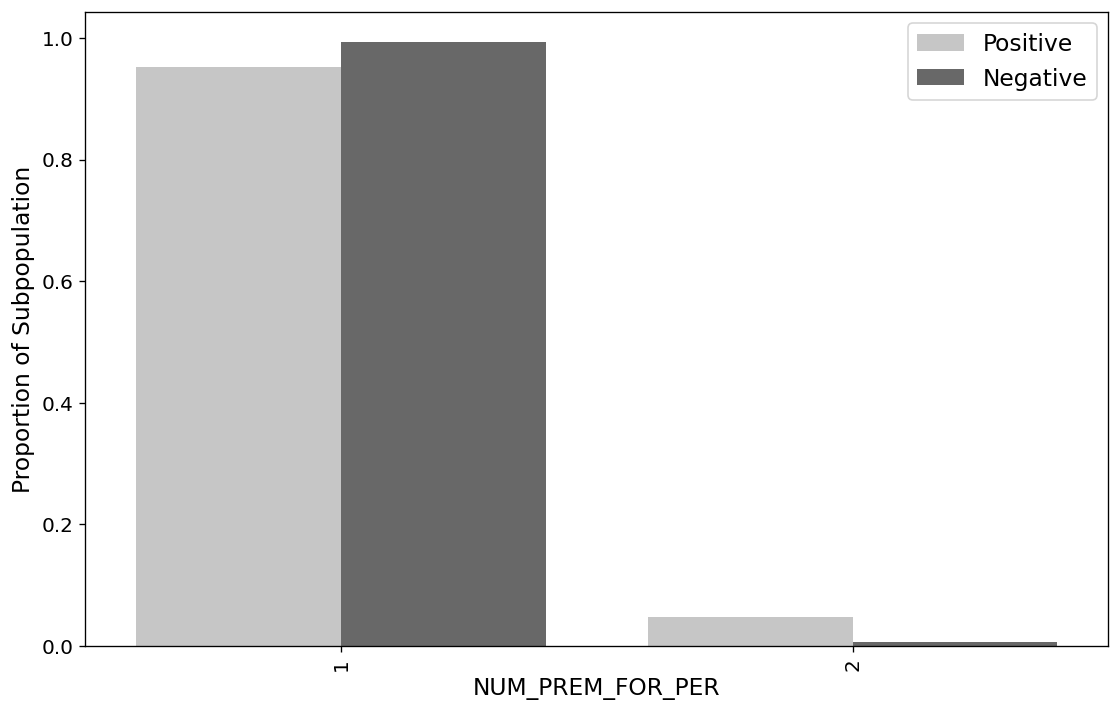

In [41]:
attribute = 'NUM_PREM_FOR_PER'

fontsize = visual_specs['fontsize']
palette = visual_specs['palette']
saturation= visual_specs['saturation']
bins = pd.Series([0,1,2], name='bin_bounds')

pos_prob = (pd.cut(pos[attribute], bins=bins, duplicates='drop', ordered=False, include_lowest=True, labels=bins.iloc[:-1].round(1)).\
    value_counts().rename('prob') / len(pos)).to_frame().reset_index()
pos_prob['Class'] = 'Positive'

neg_prob = (pd.cut(neg[attribute], bins=bins, duplicates='drop', ordered=False, include_lowest=True, labels=bins.iloc[:-1].round(1)).\
    value_counts().rename('prob') / len(neg)).to_frame().reset_index()
neg_prob['Class'] = 'Negative'

all_prob = pos_prob
all_prob = all_prob.append(neg_prob).rename({'index':'bin'}, axis=1)

fig, ax = plt.subplots()
sns.barplot(
    ax=ax,
    data=all_prob, 
    x='bin', 
    y='prob',
    hue='Class',
    palette=palette,
    saturation=saturation
)

plt.ylabel('Proportion of Subpopulation', fontsize=fontsize)
plt.yticks(fontsize=fontsize-2)
ax.set_xlabel(attribute, fontsize=fontsize)
ax.set_xticklabels([1,2], fontsize=fontsize-2, rotation=90)

plt.legend(fontsize=fontsize);
#plt.xlim(xlim)

plt.savefig(image_dest + 'PN_on'+ attribute + '.png', dpi=300, bbox_inches='tight')


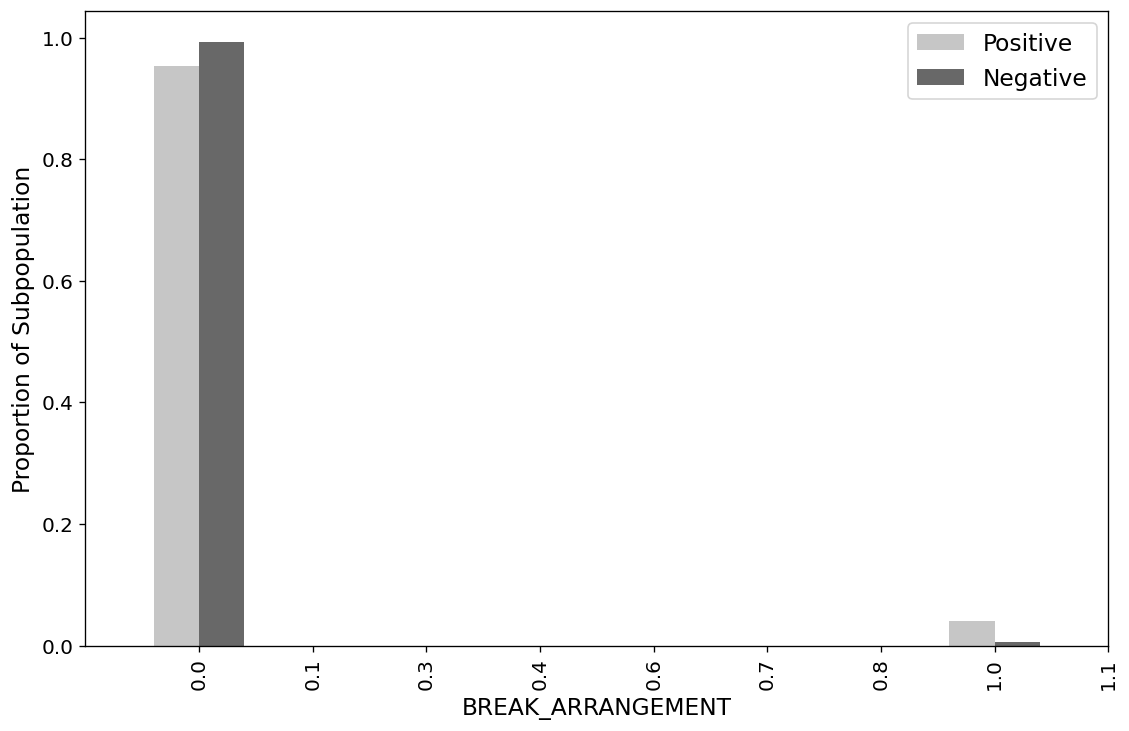

In [59]:
attribute = 'BREAK_ARRANGEMENT'
pop_proportion(pos=pos, 
               neg=neg, 
               attribute=attribute, 
               xlim=(-1,8), 
               visual_specs=visual_specs,                
               image_dest=image_dest
              )

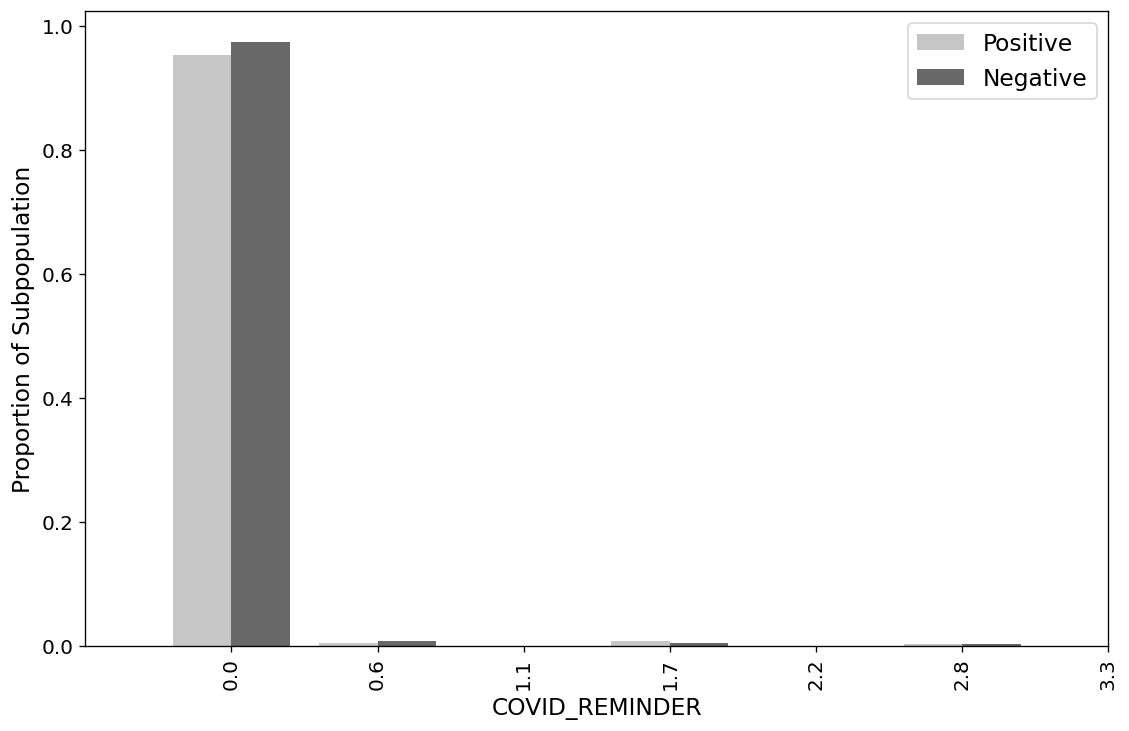

In [61]:
attribute = 'COVID_REMINDER'
pop_proportion(pos=pos, 
               neg=neg, 
               attribute=attribute, 
               xlim=(-1,6), 
               visual_specs=visual_specs,                
               image_dest=image_dest
              )

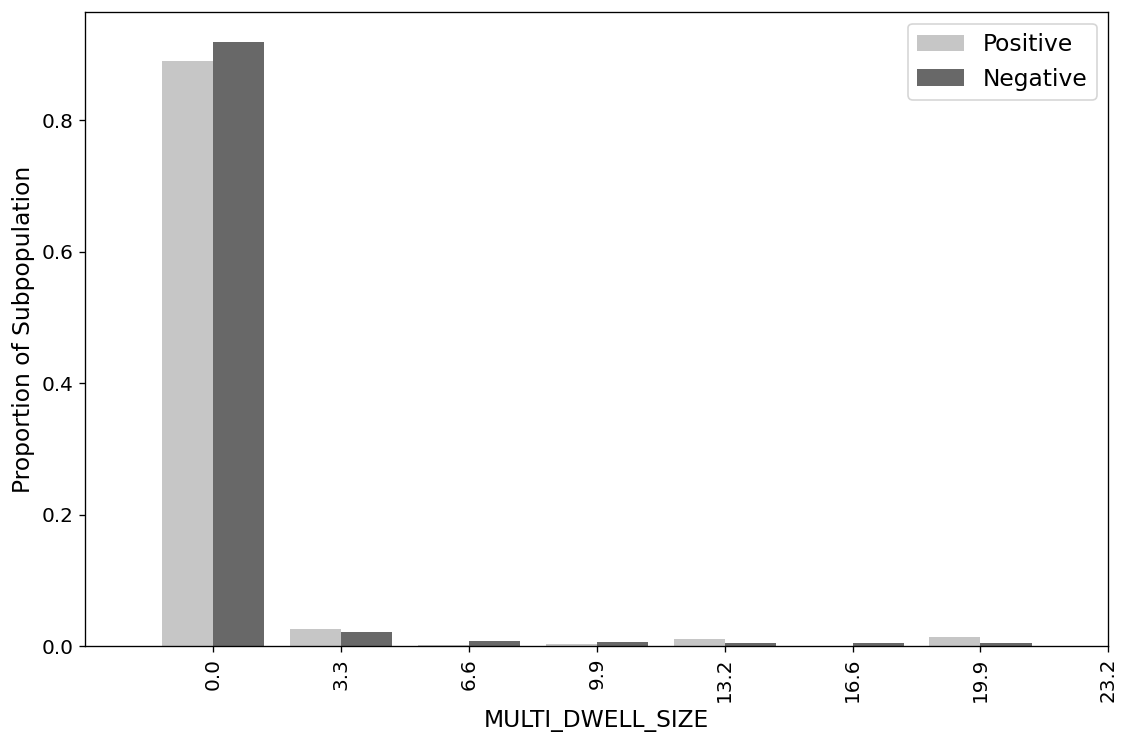

In [63]:
attribute = 'MULTI_DWELL_SIZE'
pop_proportion(pos=pos, 
               neg=neg, 
               attribute=attribute, 
               xlim=(-1,7), 
               visual_specs=visual_specs,                
               image_dest=image_dest
              )

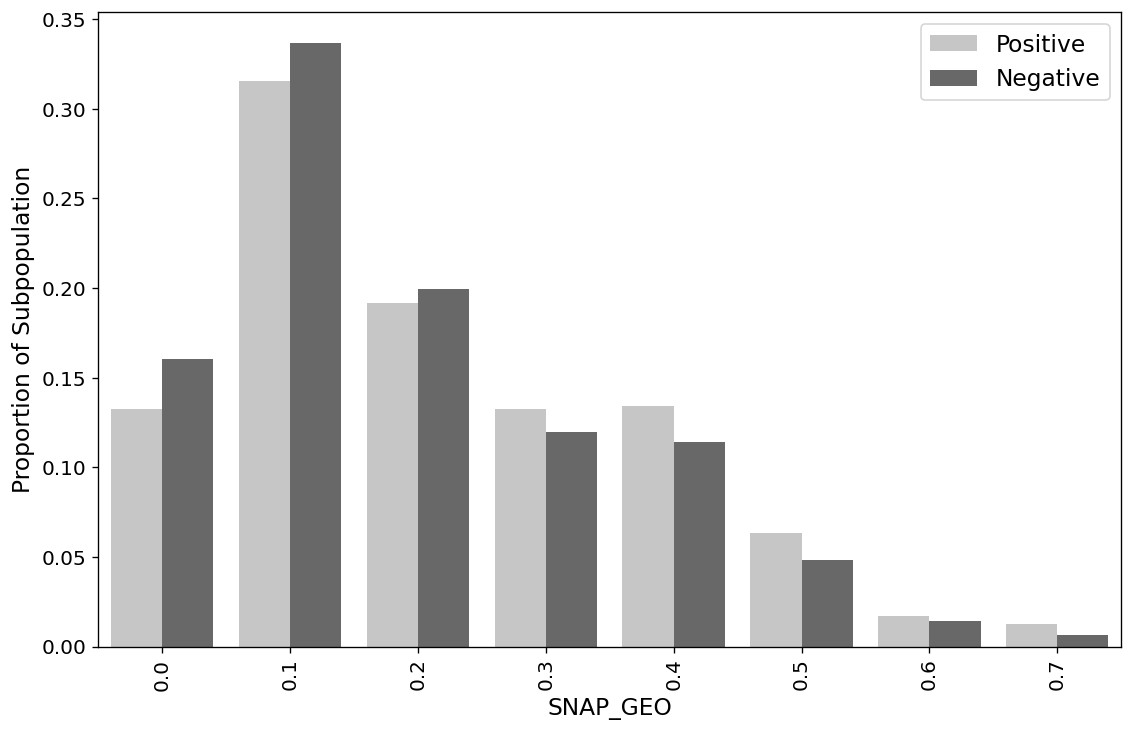

In [6]:
attribute = 'SNAP_GEO'
pop_proportion(pos=pos, 
               neg=neg, 
               attribute=attribute, 
               xlim=None, 
               visual_specs=visual_specs,                
               image_dest=image_dest
              )

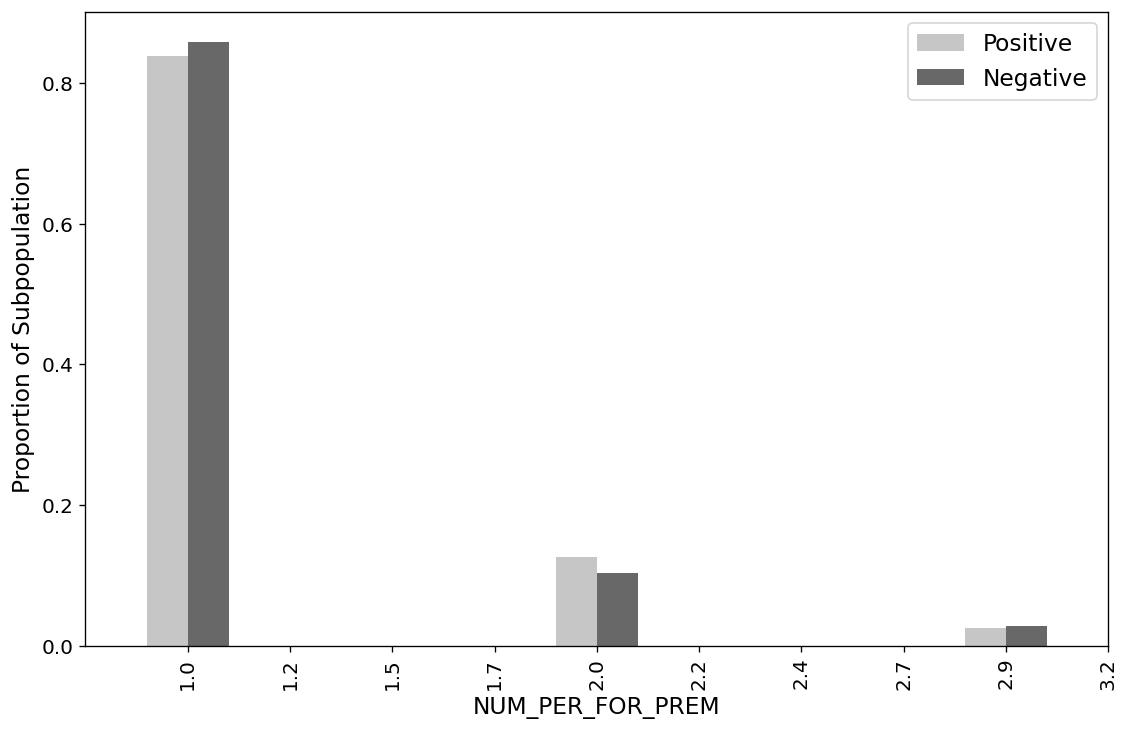

In [74]:
attribute = 'NUM_PER_FOR_PREM'
pop_proportion(pos=pos, 
               neg=neg, 
               attribute=attribute, 
               xlim=(-1,9), 
               visual_specs=visual_specs,                
               image_dest=image_dest
              )

## Investigate Patterns in Time

In [39]:
pos = df[(df['MO_AWAY'] != 100) & (df['MO_AWAY'] >= 0)]
neg = df[~df.CMIS_MATCH]
print(len(pos[~pos.CMIS_MATCH]))
print(neg.CMIS_MATCH.sum())

0
0


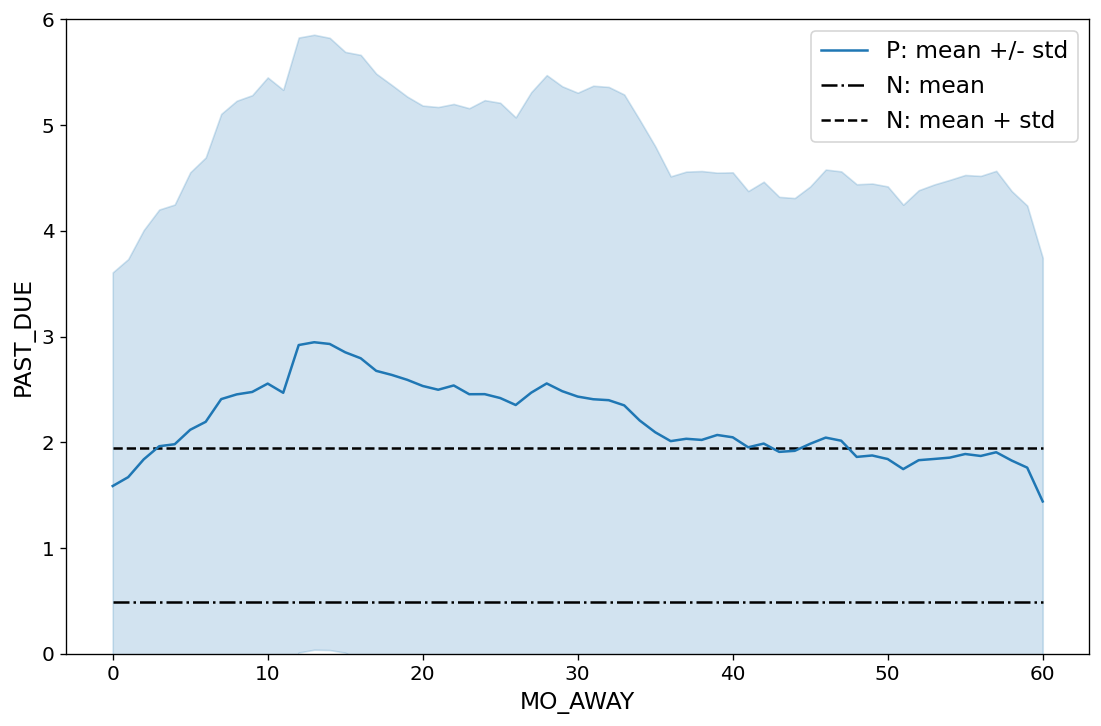

In [53]:
on = 'PAST_DUE'

fontsize = visual_specs['fontsize']
palette = visual_specs['palette']
mean = neg[on].describe()['mean']
std = neg[on].describe()['std']

sns.lineplot(data=pos, x="MO_AWAY", y=on, ci='sd', palette=palette, label='P: mean +/- std')
xmin = pos.MO_AWAY.min()
xmax = pos.MO_AWAY.max()

#plt.hlines(mean-std, xmin=xmin, xmax=xmax, color='black', label='N: mean +/- std', linestyle='dashed')
plt.hlines(mean, xmin=xmin, xmax=xmax, color='black', label='N: mean', linestyle='dashdot')
plt.hlines(mean+std, xmin=xmin, xmax=xmax, color='black', label='N: mean + std', linestyle='dashed')
plt.legend(fontsize=fontsize)

plt.ylabel(on, fontsize=fontsize)
plt.yticks(fontsize=fontsize-2)
plt.ylim((0,6))
plt.xlabel('MO_AWAY', fontsize=fontsize)
plt.xticks(fontsize=fontsize-2)
plt.legend(fontsize=fontsize)

plt.savefig(image_dest + 'PN_mo_away_on_'+ on + '.png', dpi=300, bbox_inches='tight')

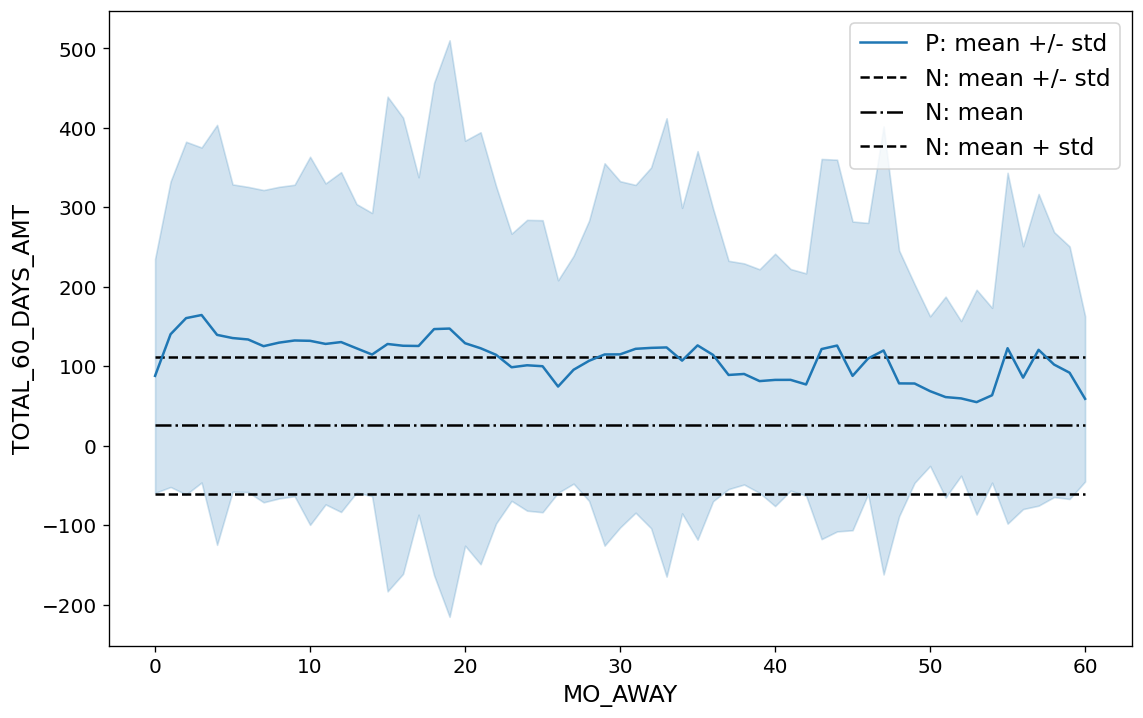

In [50]:
on = 'TOTAL_60_DAYS_AMT'

fontsize = visual_specs['fontsize']
palette = visual_specs['palette']
mean = neg[on].describe()['mean']
std = neg[on].describe()['std']

sns.lineplot(data=pos, x="MO_AWAY", y=on, ci='sd', palette=palette, label='P: mean +/- std')
xmin = pos.MO_AWAY.min()
xmax = pos.MO_AWAY.max()

plt.hlines(mean-std, xmin=xmin, xmax=xmax, color='black', label='N: mean +/- std', linestyle='dashed')
plt.hlines(mean, xmin=xmin, xmax=xmax, color='black', label='N: mean', linestyle='dashdot')
plt.hlines(mean+std, xmin=xmin, xmax=xmax, color='black', label='N: mean + std', linestyle='dashed')
plt.legend(fontsize=fontsize)

plt.ylabel(on, fontsize=fontsize)
plt.yticks(fontsize=fontsize-2)
plt.xlabel('MO_AWAY', fontsize=fontsize)
plt.xticks(fontsize=fontsize-2)
plt.legend(fontsize=fontsize)

plt.savefig(image_dest + 'PN_mo_away_on_'+ on + '.png', dpi=300, bbox_inches='tight')

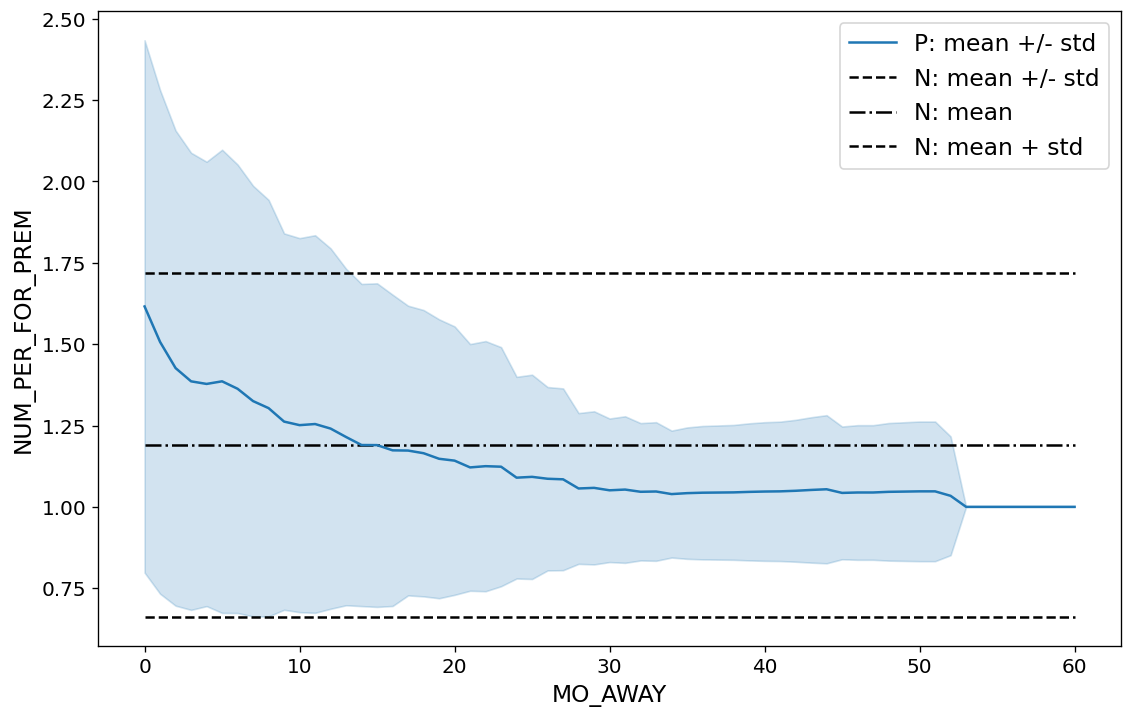

In [49]:
on = 'NUM_PER_FOR_PREM'

fontsize = visual_specs['fontsize']
palette = visual_specs['palette']
mean = neg[on].describe()['mean']
std = neg[on].describe()['std']

sns.lineplot(data=pos, x="MO_AWAY", y=on, ci='sd', palette=palette, label='P: mean +/- std')
xmin = pos.MO_AWAY.min()
xmax = pos.MO_AWAY.max()

plt.hlines(mean-std, xmin=xmin, xmax=xmax, color='black', label='N: mean +/- std', linestyle='dashed')
plt.hlines(mean, xmin=xmin, xmax=xmax, color='black', label='N: mean', linestyle='dashdot')
plt.hlines(mean+std, xmin=xmin, xmax=xmax, color='black', label='N: mean + std', linestyle='dashed')
plt.legend(fontsize=fontsize)

plt.ylabel(on, fontsize=fontsize)
plt.yticks(fontsize=fontsize-2)
plt.xlabel('MO_AWAY', fontsize=fontsize)
plt.xticks(fontsize=fontsize-2)
plt.legend(fontsize=fontsize)

plt.savefig(image_dest + 'PN_mo_away_on_'+ on + '.png', dpi=300, bbox_inches='tight')

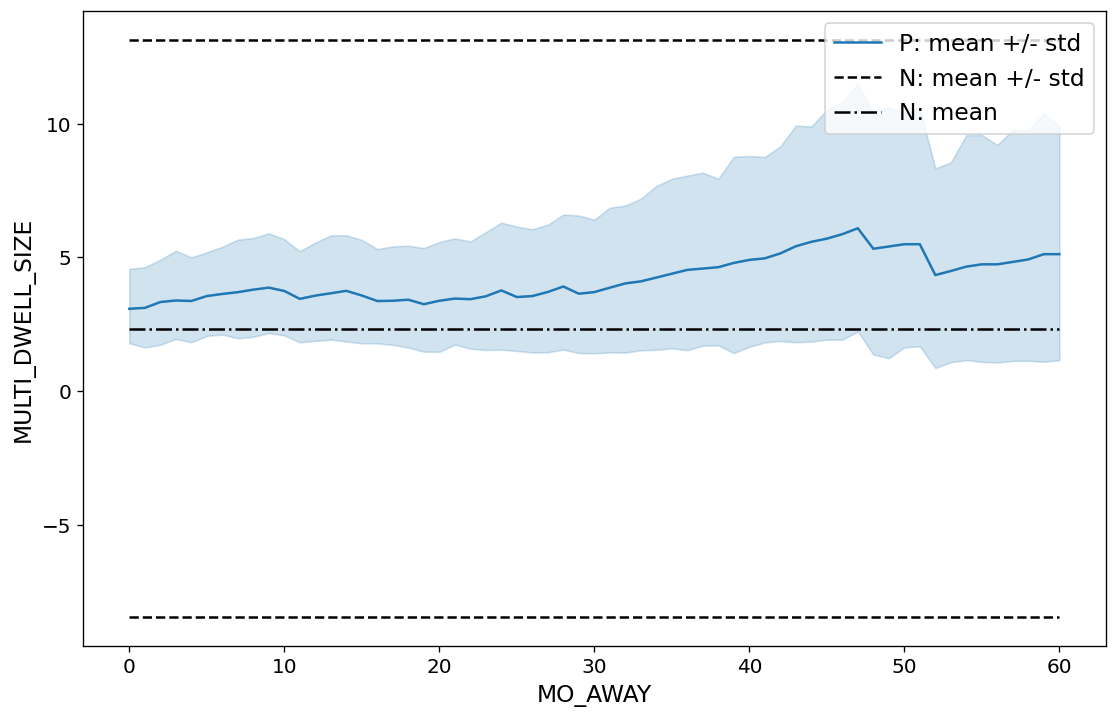

In [78]:
attribute = 'MULTI_DWELL_SIZE'
plot_pn_mo_away_on(pos=pos, neg=neg, on=attribute, visual_specs=visual_specs, image_dest=image_dest)

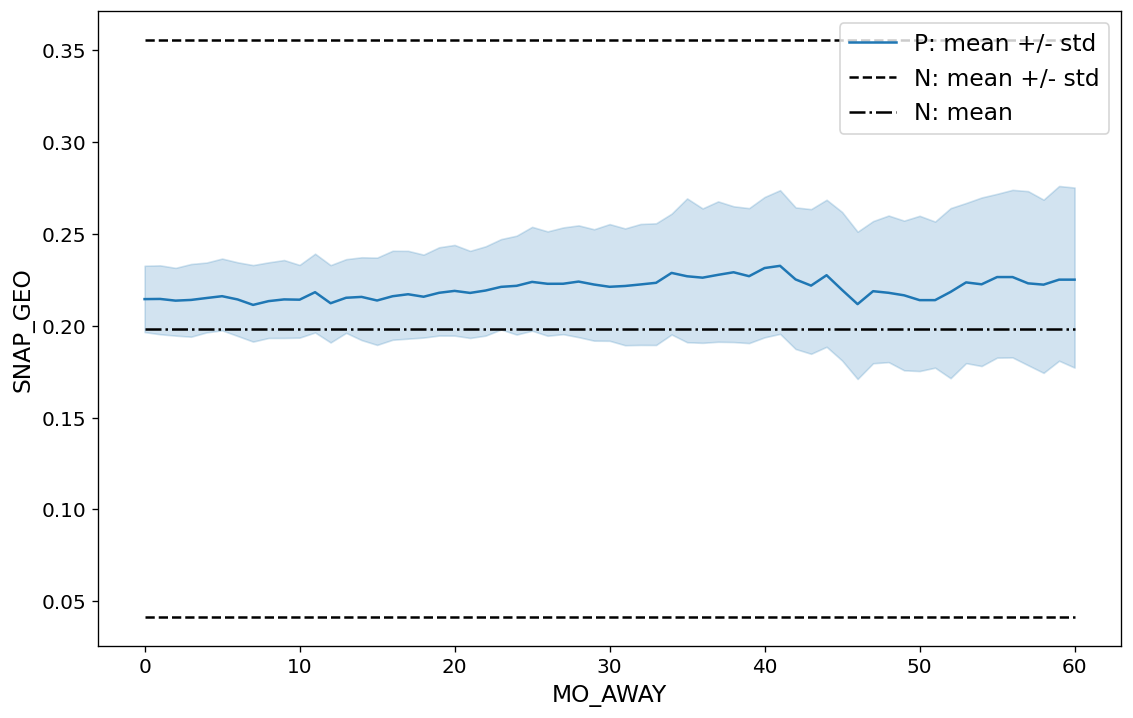

In [79]:
attribute = 'SNAP_GEO'
plot_pn_mo_away_on(pos=pos, neg=neg, on=attribute, visual_specs=visual_specs, image_dest=image_dest)

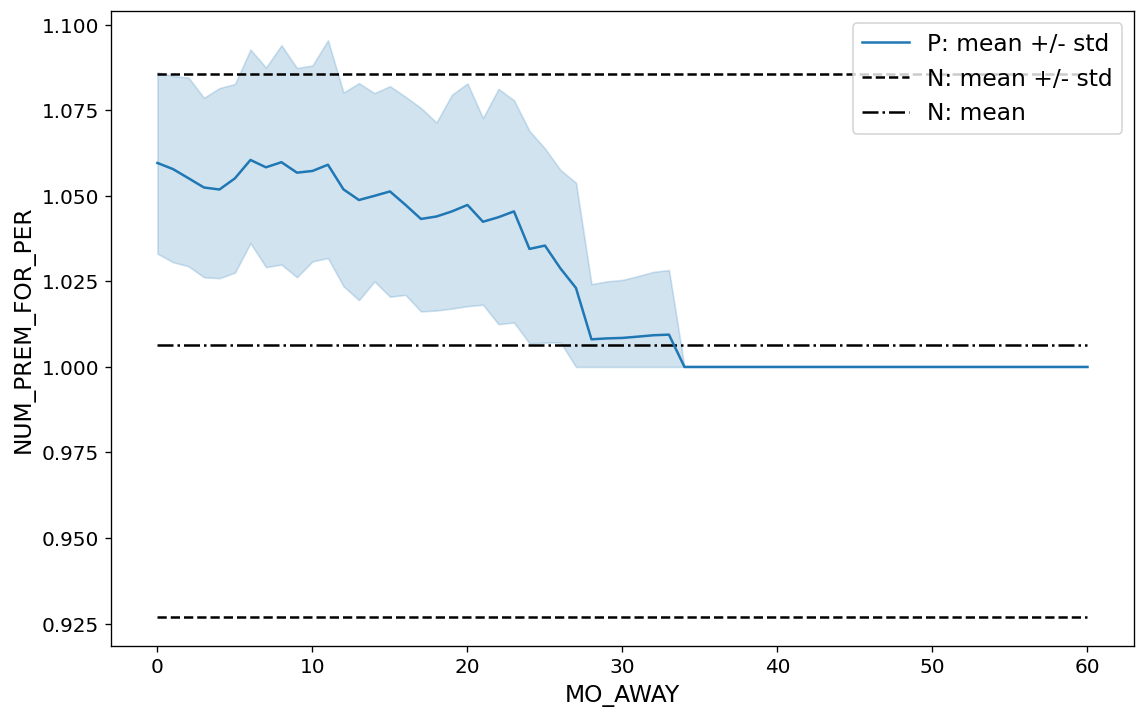

In [81]:
attribute = 'NUM_PREM_FOR_PER'
plot_pn_mo_away_on(pos=pos, neg=neg, on=attribute, visual_specs=visual_specs, image_dest=image_dest)

# Geographical

In [60]:
infile = open('../../002_Data/Release_4/processed_sa.pickle','rb')
sa = pickle.load(infile)
infile.close()

## Zip

In [59]:
df_zip = df[['POSTAL', 'SPA_PER_ID'] + outcome_cols]
df_zip = df_zip.groupby('SPA_PER_ID')[['POSTAL'] + outcome_cols].last()

In [60]:
df_zip = pd.get_dummies(data=df_zip, prefix='ZIP', columns=['POSTAL'])
df_zip.columns.to_list()

['CMIS_MATCH',
 'MO_AWAY',
 'WITHIN_6_MO_PRIOR_LAST_DATA',
 'LAST_MO_W_DATA',
 'ZIP_99016',
 'ZIP_99027',
 'ZIP_99037',
 'ZIP_99201',
 'ZIP_99202',
 'ZIP_99203',
 'ZIP_99204',
 'ZIP_99205',
 'ZIP_99206',
 'ZIP_99207',
 'ZIP_99208',
 'ZIP_99212',
 'ZIP_99216',
 'ZIP_99217',
 'ZIP_99218',
 'ZIP_99223',
 'ZIP_99224']

In [61]:
zip_cols = df_zip.drop(outcome_cols, axis=1).columns.to_list()
zip_cols

['ZIP_99016',
 'ZIP_99027',
 'ZIP_99037',
 'ZIP_99201',
 'ZIP_99202',
 'ZIP_99203',
 'ZIP_99204',
 'ZIP_99205',
 'ZIP_99206',
 'ZIP_99207',
 'ZIP_99208',
 'ZIP_99212',
 'ZIP_99216',
 'ZIP_99217',
 'ZIP_99218',
 'ZIP_99223',
 'ZIP_99224']

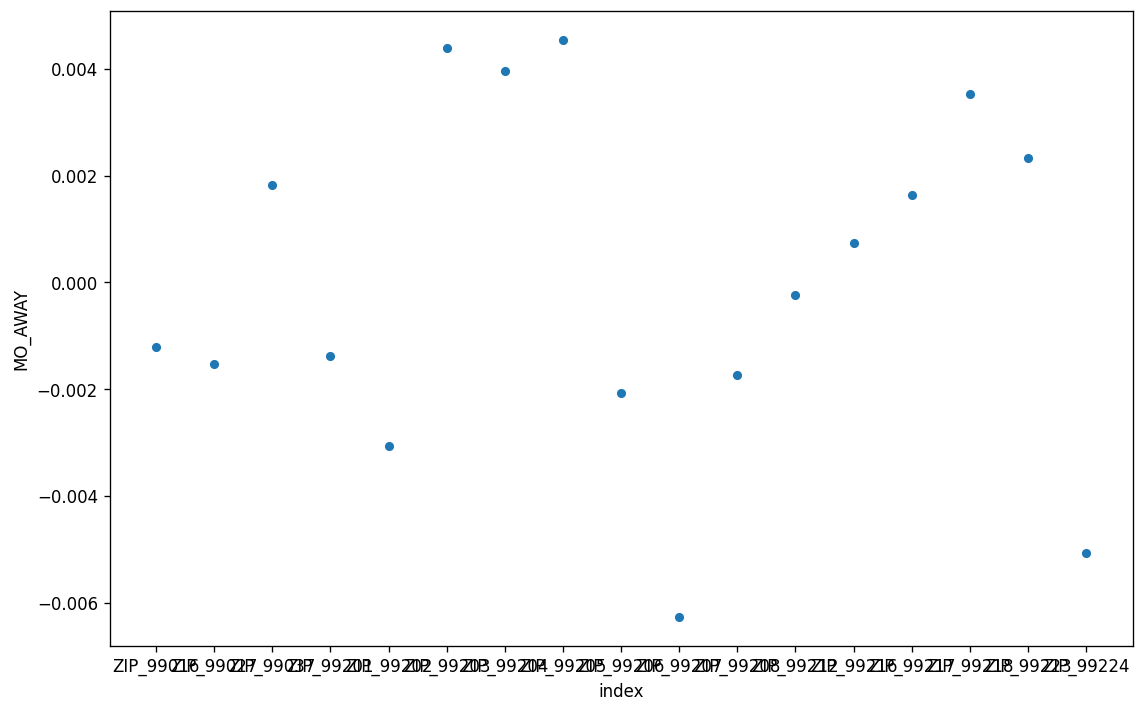

In [77]:
corr_zip_mo_away = point_biserial_corr(continuous=df_zip['MO_AWAY'].to_frame(), binary=df_zip[zip_cols]).transpose()
corr_zip_mo_away.reset_index().plot(kind='scatter', x='index', y='MO_AWAY');

In [34]:
def prop_agree_pos(data:pd.DataFrame, first:str, second:str) -> float:
    combined = data[[first, second]].copy()
    total = len(combined)
    agree = (combined[first] & (combined[first] == combined[second])).sum()
    return agree/total

def prop_agree_pos_multiple(data:pd.DataFrame, first_group:list, second_group:list) -> pd.DataFrame:
    results = pd.DataFrame(index=first_group, columns=second_group)
    for first_el in first_group:
        for second_el in second_group:
            results.loc[first_el, second_el] = prop_agree_pos(data=data, first=first_el, second=second_el)
    return results

In [63]:
binary_outcomes = outcome_cols.copy()
binary_outcomes.remove('MO_AWAY')

In [64]:
prop_zip_outs = prop_agree_pos_multiple(data=df_zip, first_group=zip_cols, second_group=binary_outcomes)
prop_zip_outs

,CMIS_MATCH,WITHIN_6_MO_PRIOR_LAST_DATA,LAST_MO_W_DATA
ZIP_99016,8.18771e-05,8.18771e-05,8.18771e-05
ZIP_99027,1.16967e-05,1.16967e-05,1.16967e-05
ZIP_99037,3.50902e-05,3.50902e-05,3.50902e-05
ZIP_99201,0.000163754,0.000163754,0.000163754
ZIP_99202,0.000245631,0.000245631,0.000245631
ZIP_99203,0.000210541,0.000210541,0.000210541
ZIP_99204,4.67869e-05,4.67869e-05,4.67869e-05
ZIP_99205,0.000479566,0.000479566,0.000479566
ZIP_99206,0.000233935,0.000233935,0.000233935
ZIP_99207,0.000491263,0.000491263,0.000491263


In [65]:
prop_zip_outs = prop_zip_outs.melt(ignore_index=False).reset_index()
prop_zip_outs.head()

,index,variable,value
0,ZIP_99016,CMIS_MATCH,8.18771e-05
1,ZIP_99027,CMIS_MATCH,1.16967e-05
2,ZIP_99037,CMIS_MATCH,3.50902e-05
3,ZIP_99201,CMIS_MATCH,0.000163754
4,ZIP_99202,CMIS_MATCH,0.000245631


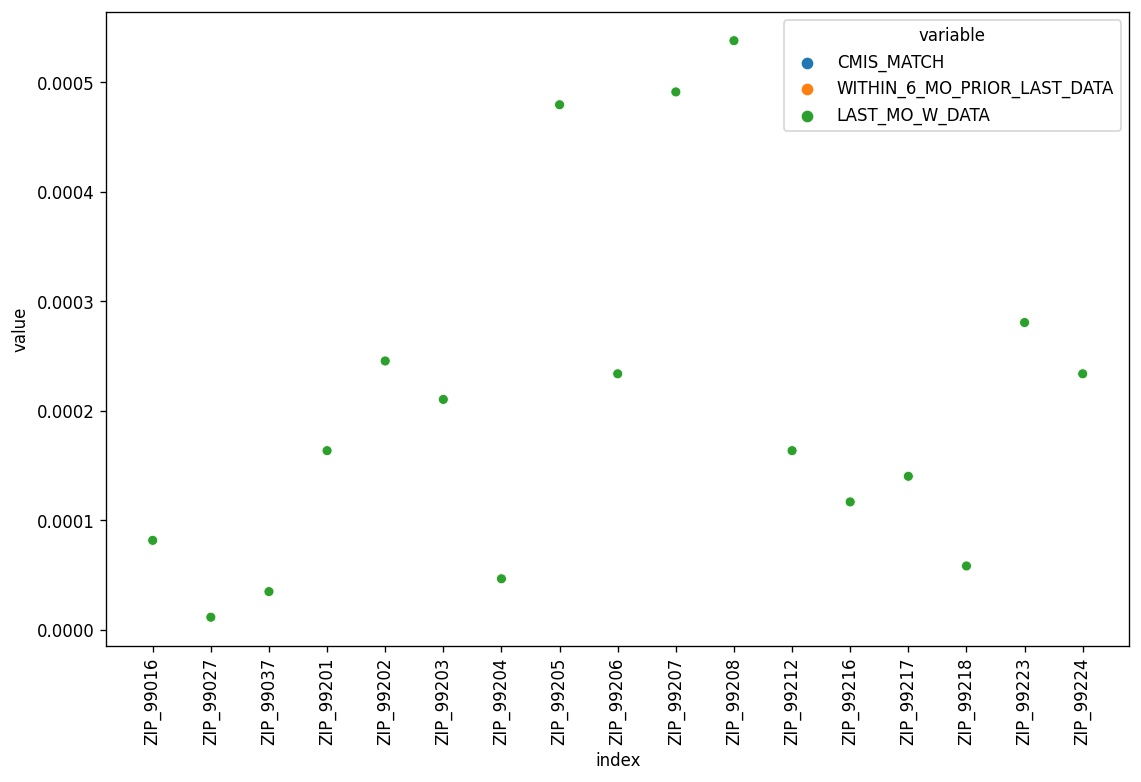

In [66]:
sns.scatterplot(data=prop_zip_outs, x='index', y='value', hue='variable')
plt.xticks(rotation=90);

## BLOCKGROUP_GEOID

In [78]:
df_block = df[['BLOCKGROUP_GEOID', 'SPA_PER_ID'] + outcome_cols]
df_block = df_block.groupby('SPA_PER_ID')[['BLOCKGROUP_GEOID'] + outcome_cols].last()

In [79]:
df_block = pd.get_dummies(data=df_block, prefix='BLK', columns=['BLOCKGROUP_GEOID'])

In [80]:
block_cols = df_block.drop(outcome_cols, axis=1).columns.to_list()

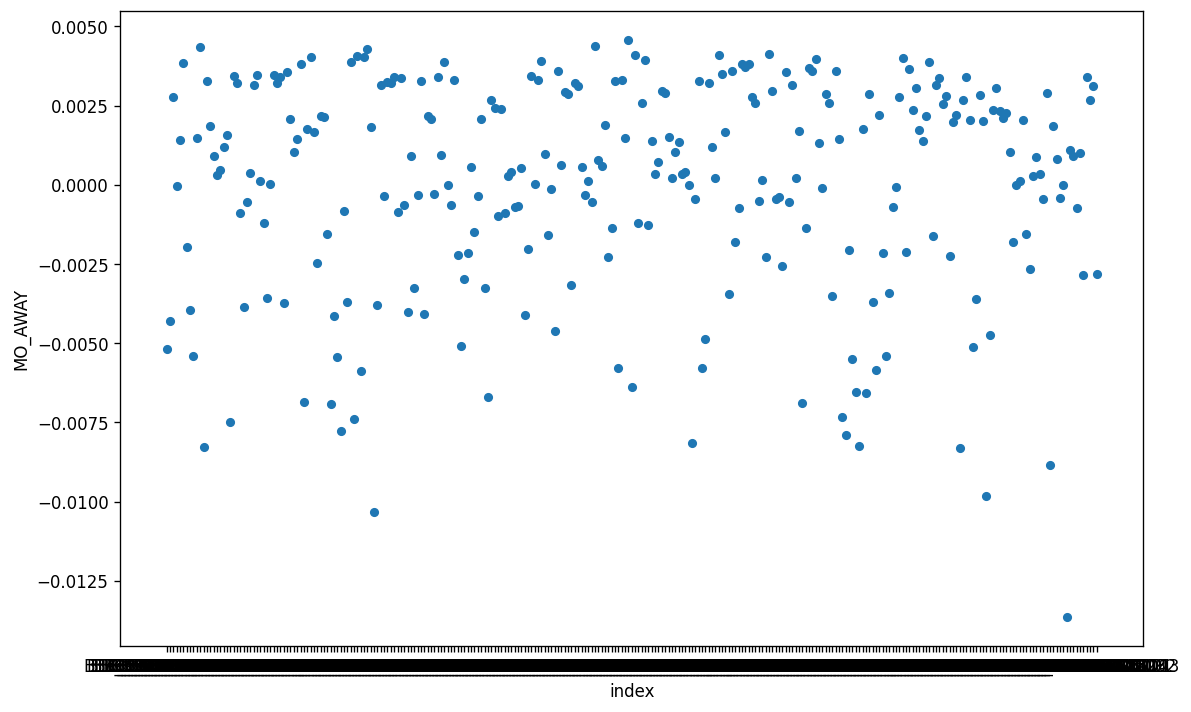

In [81]:
corr_block_mo_away = point_biserial_corr(continuous=df_block['MO_AWAY'].to_frame(), binary=df_block[block_cols]).transpose()
corr_block_mo_away.reset_index().plot(kind='scatter', x='index', y='MO_AWAY');

In [83]:
prop_block_outs = prop_agree_pos_multiple(data=df_block, first_group=block_cols, second_group=binary_outcomes)
prop_block_outs = prop_block_outs.melt(ignore_index=False).reset_index()
prop_block_outs.head()

,index,variable,value
0,BLK_530630002001,CMIS_MATCH,2.33935e-05
1,BLK_530630002002,CMIS_MATCH,2.33935e-05
2,BLK_530630002003,CMIS_MATCH,0
3,BLK_530630002004,CMIS_MATCH,1.16967e-05
4,BLK_530630002005,CMIS_MATCH,1.16967e-05


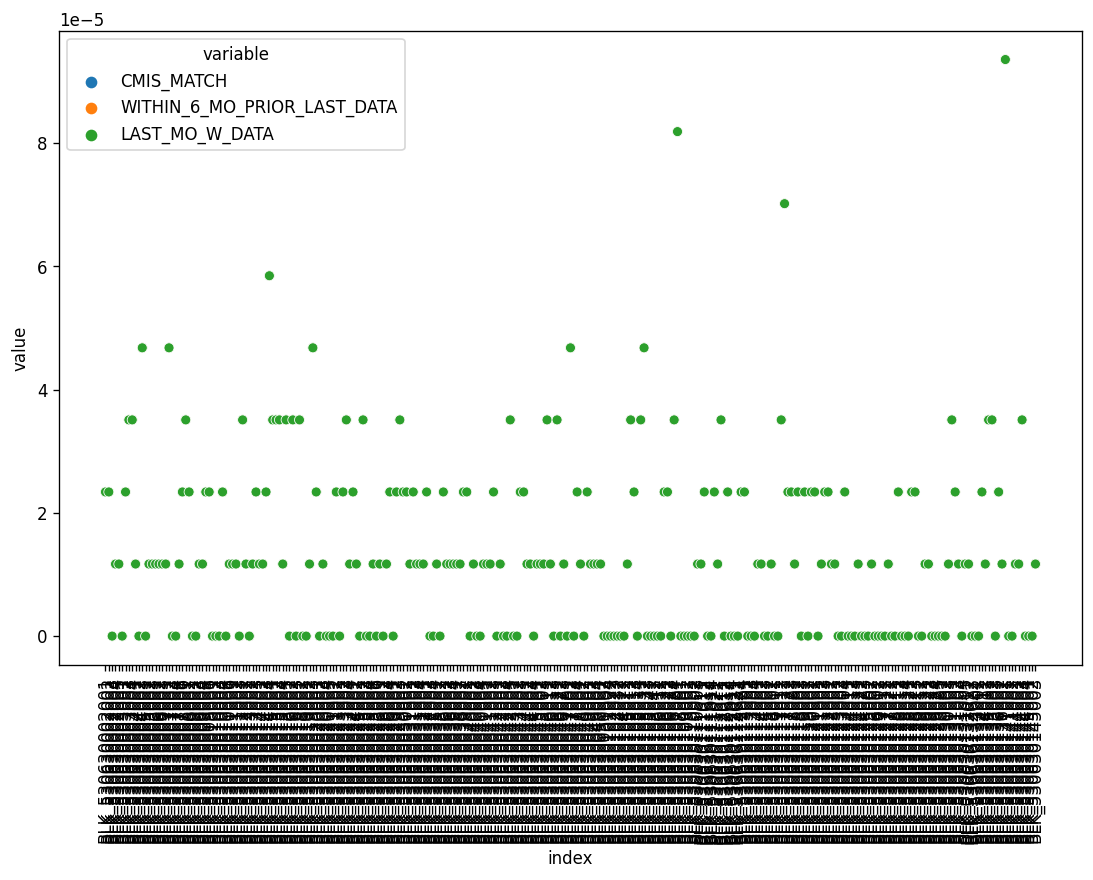

In [84]:
sns.scatterplot(data=prop_block_outs, x='index', y='value', hue='variable')
plt.xticks(rotation=90);

## SPA_PREM_ID

In [61]:
sa.head()

,SPA_ACCT_ID,SPA_PREM_ID,SPA_PER_ID,CMIS_MATCH,APARTMENT,ENROLL_DATE,HAS_COTENANT
0,1,137,90587,False,False,(),True
1,2,36,300947,False,False,(),True
2,3,74899,278105,False,True,(),False
3,4,8,179676,False,False,(),True
4,5,112,237267,False,False,(),False


In [62]:
sa[sa.CMIS_MATCH].groupby('SPA_PREM_ID').SPA_PER_ID.nunique().value_counts()

1    1928
2      70
3       1
Name: SPA_PER_ID, dtype: int64

# Time

In [82]:
from custom_methods.calc_time import calc_time_from_sec

calc_time_from_sec(time.time() - startTime)

hours:minutes:seconds = 2:31:45.00186538696289
